In [10]:
import requests
from fake_useragent import UserAgent
from fp.fp import FreeProxy
import re
import time
import plotly.express as px
from googletrans import Translator
import os
import pandas as pd 
from tqdm import tqdm
tqdm.pandas()

In [2]:
# now need to get every *major* site change from wayback and download the html for each site given the urls above

# we will need to see how many urls change

# we need to define what a *major* change is

# time frame 12/1/2021 - 12/1/2023



### define the urls to scrape

In [3]:
urls_dict = {
    'bankinter.com': 'https://web.archive.org/web/20240410000000/http://www.bankinter.com/banca/cuentas-tarjetas/cuentas/cuenta-nomina',
    'n26.com': 'https://web.archive.org/web/20240226000000/https://n26.com/es-es/cuenta-ahorro',
    'myinvestor.es': 'https://web.archive.org/web/20230823000000/http://myinvestor.es/cuentas-tarjetas/cuentas',
    'openbank.es': 'https://web.archive.org/web/20240404000000/https://www.openbank.es/cuenta-ahorro-bienvenida',
    'n26.com': 'https://web.archive.org/web/20240226000000/https://n26.com/es-es/cuenta-sin-comisiones',
    'bancsabadell.com': 'https://web.archive.org/web/20240307000000/https://www.bancsabadell.com/cuenta-online/',
    'abanca.com': 'https://web.archive.org/web/20240308000000/http://www.abanca.com:80/es/cuentas/cuenta-online',
    'evobanco.com': 'https://web.archive.org/web/20240115000000/http://www.evobanco.com:80/cuenta-inteligente',
    'ing.es': 'https://web.archive.org/web/20230921000000/https://www.ing.es/cuenta-nocuenta-ing',
    'bbva.es': 'https://web.archive.org/web/20240403000000/https://www.bbva.es/personas/productos/cuentas/cuenta-online-sin-comisiones.html',
    'revolut.com': 'https://web.archive.org/web/20231210000000/https://www.revolut.com/es-ES/a-radically-better-account',
    'bancosantander.es': 'https://web.archive.org/web/20240414000000/https://www.bancosantander.es/particulares/cuentas-tarjetas/cuentas-corrientes/cuenta-online-sin-comisiones',
    'ing.es': 'https://web.archive.org/web/20230921000000/https://www.ing.es/cuenta-nomina-ing'
}


# for each url extract the date and replace it with {date}

for key, value in urls_dict.items():
    if 'web.archive.org' in value:
        date = value.split('/')[4]
        urls_dict[key] = value.replace(date, '{date}')

print(urls_dict)



{'bankinter.com': 'https://web.archive.org/web/{date}/http://www.bankinter.com/banca/cuentas-tarjetas/cuentas/cuenta-nomina', 'n26.com': 'https://web.archive.org/web/{date}/https://n26.com/es-es/cuenta-sin-comisiones', 'myinvestor.es': 'https://web.archive.org/web/{date}/http://myinvestor.es/cuentas-tarjetas/cuentas', 'openbank.es': 'https://web.archive.org/web/{date}/https://www.openbank.es/cuenta-ahorro-bienvenida', 'bancsabadell.com': 'https://web.archive.org/web/{date}/https://www.bancsabadell.com/cuenta-online/', 'abanca.com': 'https://web.archive.org/web/{date}/http://www.abanca.com:80/es/cuentas/cuenta-online', 'evobanco.com': 'https://web.archive.org/web/{date}/http://www.evobanco.com:80/cuenta-inteligente', 'ing.es': 'https://web.archive.org/web/{date}/https://www.ing.es/cuenta-nomina-ing', 'bbva.es': 'https://web.archive.org/web/{date}/https://www.bbva.es/personas/productos/cuentas/cuenta-online-sin-comisiones.html', 'revolut.com': 'https://web.archive.org/web/{date}/https://

### set user agent to generate mobile user agents and add a random cookie that was generated by the site

In [ ]:
ua = UserAgent(platforms='mobile')
cookies = {
    'ebk_idioma': 'es',
    'bkpolicy': 'aceptacion=total//tecnicas=si//personalizacion=si//analiticas=si//publicitarias=si',
    'donation-identifier': '930c0d558ce393df48a48703702b5ece',
    'abtest-identifier': '6d4f3a9bc7246188abbe3fcef7011035'
}

### scrape the wayback machine

In [ ]:
def get_way_back_page(month, year, url, domain):
    if month < 10:
        month = f'0{month}'
    url = url.format(date=f'{year}{month}01000000')
    print(url)
    response = None
    try:
        proxy = FreeProxy(timeout=3, rand=True).get()
        print(proxy)
        proxies = {
            'http': {proxy}
        }
        headers = {'User-Agent': ua.random}
        response = requests.get(url, headers=headers, cookies=cookies, proxies=proxies, timeout=10)
    except Exception as e:
        print('Error: Connection Error')
        print(str(e))
        print('------------------------------------')
        time.sleep(120)
        month = int(month) - 1
    if response is not None and response.status_code == 200:
        with open(f'html_pages/{domain}_{year}_{month}.html', 'w') as f:
            f.write(response.text)
        print(f'{domain}_{year}_{month}.html saved')
        print('------------------------------------')
    elif response is None: 
        print('Connection Error - Resetting')
        print('------------------------------------')
    else: 
        print(f'Error: {response.status_code}')
        print('------------------------------------')

In [ ]:
# now for each url in the dictionary we navigate to a month in each year from 2021 to 2023 and download the html each time 

for key, value in urls_dict.items():
    for year in range(2021, 2024):
        for month in range(1, 13):
            get_way_back_page(month, year, value, key)
    
    

https://web.archive.org/web/20210101000000/https://www.bancsabadell.com/cuenta-online/
http://140.238.247.9:8100
bancsabadell.com_2021_01.html saved
------------------------------------
https://web.archive.org/web/20210201000000/https://www.bancsabadell.com/cuenta-online/
http://13.38.176.104:3128
bancsabadell.com_2021_02.html saved
------------------------------------
https://web.archive.org/web/20210301000000/https://www.bancsabadell.com/cuenta-online/
http://3.122.84.99:3128
bancsabadell.com_2021_03.html saved
------------------------------------
https://web.archive.org/web/20210401000000/https://www.bancsabadell.com/cuenta-online/
http://3.127.62.252:80
bancsabadell.com_2021_04.html saved
------------------------------------
https://web.archive.org/web/20210501000000/https://www.bancsabadell.com/cuenta-online/
http://52.196.1.182:80
bancsabadell.com_2021_05.html saved
------------------------------------
https://web.archive.org/web/20210601000000/https://www.bancsabadell.com/cuenta

### read in all the html page data 

In [ ]:
# list all folders in the html_pages directory

all_file_data = []

for root, dirs, files in os.walk('html_pages'):
    for dir in dirs: 
        dir = root + '/' + dir
        for file in os.listdir(dir):
            file = dir + '/' + file
            file_data = {}
            # split the filename by _ 
            file_name = file.split('/')[-1].split('_')
            file_data['site'] = file_name[0]
            file_data['year'] = file_name[1]
            file_data['month'] = file_name[2].split('.')[0]

            all_file_data.append(file_data)

all_file_data = pd.DataFrame(all_file_data)

all_file_data
        

site  year month
0    myinvestor.es  2023    07
1    myinvestor.es  2022    06
2    myinvestor.es  2022    10
3    myinvestor.es  2021    01
4    myinvestor.es  2022    11
..             ...   ...   ...
364     abanca.com  2022    09
365     abanca.com  2023    12
366     abanca.com  2023    04
367     abanca.com  2022    05
368     abanca.com  2021    03

[369 rows x 3 columns]

### double check to make sure all dates have been captured 

In [ ]:
# find all the sites that do not have 12 months of data for each year

# group by site and year and unique months for each year to see if there are any missing months
all_file_data.month = all_file_data.month.astype(int)
grouped = all_file_data.groupby(['site', 'year'])['month'].unique().reset_index()

# get values that are not in 1-12 list

def missing_months(months):
    missing = [x for x in range(1, 13) if x not in months]
    return missing

grouped['missing_months'] = grouped['month'].apply(missing_months)

grouped['missing_months_len'] = grouped['missing_months'].apply(len)

grouped = grouped.loc[grouped['missing_months_len'] > 0]

grouped

site  year                                 month  \
0          abanca.com  2021      [1, 6, 11, 8, 4, 12, 5, 9, 2, 3]   
2          abanca.com  2023  [11, 6, 10, 1, 3, 2, 5, 9, 8, 12, 4]   
3   bancosantander.es  2021  [6, 10, 11, 7, 1, 2, 3, 12, 4, 9, 5]   
4   bancosantander.es  2022  [1, 10, 6, 7, 11, 8, 4, 12, 5, 9, 3]   
5   bancosantander.es  2023   [1, 7, 10, 6, 9, 5, 4, 12, 8, 3, 2]   
7    bancsabadell.com  2022      [6, 7, 11, 1, 2, 3, 8, 4, 12, 5]   
11      bankinter.com  2023              [1, 6, 7, 4, 8, 5, 2, 3]   
13            bbva.es  2022  [9, 5, 12, 4, 8, 3, 1, 11, 7, 6, 10]   
14            bbva.es  2023  [8, 12, 4, 5, 9, 2, 3, 1, 10, 11, 7]   
15       evobanco.com  2021  [1, 7, 11, 10, 5, 9, 8, 4, 12, 3, 2]   
16       evobanco.com  2022  [11, 7, 6, 10, 1, 3, 2, 9, 12, 4, 8]   
18             ing.es  2021     [5, 9, 8, 12, 3, 1, 7, 11, 10, 6]   
20             ing.es  2023     [2, 3, 8, 12, 4, 9, 6, 10, 11, 7]   
23      myinvestor.es  2023           [7, 6, 1, 3, 2, 9, 5, 4, 8]   
28        openbank.es  2022  [1, 7, 11, 10, 6, 5, 4, 12, 8, 3, 2]   
30        revolut.com  2021  [1, 10, 11, 7, 12, 4, 8, 9, 5, 2, 3]   
31        revolut.com  2022   [6, 7, 11, 1, 2, 3, 8, 4, 12, 5, 9]   
32        revolut.com  2023  [7, 11, 10, 6, 1, 3, 2, 9, 5, 12, 8]   

     missing_months  missing_months_len  
0           [7, 10]                   2  
2               [7]                   1  
3               [8]                   1  
4               [2]                   1  
5              [11]                   1  
7           [9, 10]                   2  
11  [9, 10, 11, 12]                   4  
13              [2]                   1  
14              [6]                   1  
15              [6]                   1  
16              [5]                   1  
18           [2, 4]                   2  
20           [1, 5]                   2  
23     [10, 11, 12]                   3  
28              [9]                   1  
30              [6]                   1  
31             [10]                   1  
32              [4]                   1

retrieve any missing data

In [ ]:
# now we need to extract all of the dates which the html was changed from each html file
for row, index in grouped.iterrows():
    site = index['site']
    year = index['year']
    missing_months = index['missing_months']
    for month in missing_months:
        get_way_back_page(month, year, urls_dict[site], site)
        time.sleep(10)

https://web.archive.org/web/20210701000000/http://www.abanca.com:80/es/cuentas/cuenta-online
http://44.219.175.186:80
abanca.com_2021_07.html saved
------------------------------------
https://web.archive.org/web/20211001000000/http://www.abanca.com:80/es/cuentas/cuenta-online
http://51.17.58.162:3128
abanca.com_2021_10.html saved
------------------------------------
https://web.archive.org/web/20230701000000/http://www.abanca.com:80/es/cuentas/cuenta-online
http://117.250.3.58:8080
abanca.com_2023_07.html saved
------------------------------------
https://web.archive.org/web/20210801000000/https://www.bancosantander.es/particulares/cuentas-tarjetas/cuentas-corrientes/cuenta-online-sin-comisiones
http://54.152.3.36:80
bancosantander.es_2021_08.html saved
------------------------------------
https://web.archive.org/web/20220201000000/https://www.bancosantander.es/particulares/cuentas-tarjetas/cuentas-corrientes/cuenta-online-sin-comisiones
http://3.123.150.192:3128
bancosantander.es_202

### extract the text from html files

In [ ]:
# now we need to extract all of the text from each html file 

from bs4 import BeautifulSoup

def extract_text_from_html(html_string):
    soup = BeautifulSoup(html_string, 'html.parser')
    text = soup.get_text()
    return text

all_file_data = []

for root, dirs, files in os.walk('html_pages'):
    for dir in dirs: 
        dir = root + '/' + dir
        print(dir)
        for file in os.listdir(dir):
            file_data = {}
            file = dir + '/' + file
            print(file)
            file_name = file.split('/')[-1].split('_')
            file_data['site'] = file_name[0]
            file_data['year'] = file_name[1]
            file_data['month'] = file_name[2].split('.')[0]
            with open(file, 'r') as f:
                html = f.read()
                file_data['text'] = extract_text_from_html(html)

            all_file_data.append(file_data)

all_file_data = pd.DataFrame(all_file_data)
all_file_data.shape
                

html_pages/myinvestor
html_pages/myinvestor/myinvestor.es_2023_07.html
html_pages/myinvestor/myinvestor.es_2022_06.html
html_pages/myinvestor/myinvestor.es_2022_10.html
html_pages/myinvestor/myinvestor.es_2021_01.html
html_pages/myinvestor/myinvestor.es_2022_11.html
html_pages/myinvestor/myinvestor.es_2022_07.html
html_pages/myinvestor/myinvestor.es_2023_06.html
html_pages/myinvestor/myinvestor.es_2023_01.html
html_pages/myinvestor/myinvestor.es_2021_10.html
html_pages/myinvestor/myinvestor.es_2021_06.html
html_pages/myinvestor/myinvestor.es_2021_07.html
html_pages/myinvestor/myinvestor.es_2021_11.html
html_pages/myinvestor/myinvestor.es_2022_01.html
html_pages/myinvestor/myinvestor.es_2021_04.html
html_pages/myinvestor/myinvestor.es_2021_12.html
html_pages/myinvestor/myinvestor.es_2022_02.html
html_pages/myinvestor/myinvestor.es_2023_03.html
html_pages/myinvestor/myinvestor.es_2021_08.html
html_pages/myinvestor/myinvestor.es_2021_09.html
html_pages/myinvestor/myinvestor.es_2023_02.htm

(393, 4)

In [ ]:
# preprocess text with spacy

def preprocess_text(text):
    
    doc = nlp(text)
    # remove stop words a
    doc = [token.lemma_ for token in doc if not token.is_stop]
    string = ' '.join(doc)
    pattern = r'(?<=\d)\s+(?=[^\w\s])'
    string = re.sub(pattern, '', string)
    return string

all_file_data['preprocessed_text'] = all_file_data['text'].apply(preprocess_text)

In [6]:
all_file_data = pd.read_csv('preprocessed_text.csv')

In [32]:
test_string = all_file_data['preprocessed_text'][0]
test_string

' remunerado 2% APR 12 mes 50.000€cuenta tarjetascuentar remunerado 2% tae1/6este número indicativo riesgo producto 1/6 indicativo menor riesgo 6/6 riesgo . MyInvestor Banco S.A.U. adherido Fondo Garantía Depósitos España Entidades Crédito . fondo garantizar depósito dinero 100000 euros titular entidad . corriente 2% APR 50000€ ¡ volver liar ! cliente , llévate 2% APR . , . 1000€ año dinero efectivo . abrir cuentado forma llevarte 2% taeabrir cuenta2% APR año0,3% APR despuésver condicionescalculado saldo 50000€ .bases legal cuentainvertir 300€ mes2% tae indefinidamente invertir : cartera indexado MyInvestor finanbestfondo top ventasfondo plan gamar MyInvestor FinanbestVer productoscalculado saldo 50000€ .bases legal cuentaY , , benefíciate ventajas:0 comisionesSin comisión apertura , mantenimiento cancelación . Transferencias gratiscero coste Unión Europea ( Zona SEPA).Sin domiciliar nóminano pediremos domiciliar nómina ingreso , tarjeta . Tarjetas débito crédito gratispídela coste ben

In [35]:
translator = Translator(service_urls=['translate.googleapis.com'])

translated = translator.translate(test_string, dest='en')
translated.text

"paid 2% APR 12 month €50,000card accountpaid account 2% tae1/6this \u200b\u200bnumber indicative product risk 1/6 indicative lower risk 6/6 risk. MyInvestor Banco S.A.U. adhered Deposit Guarantee Fund Spain Credit Entities. fund guarantee deposit money 100,000 euros entity holder. current 2% APR €50,000 get back together! customer, get 2% APR. , . €1000 year cash. open account form take 2% taeopen account2% APR year0.3% APR latersee conditionscalculated balance €50,000.legal account basesinvest €300 month2% tae indefinitely invest: indexed portfolio MyInvestor finanbesttop sales fundgamar plan fund MyInvestor FinanbestSee productscalculated balance €50,000.legal account basesY ,, benefit advantages:0 commissionsNo opening commission, cancellation maintenance. Free transfers zero cost European Union (SEPA Zone). Without direct debit payroll we will not ask for direct debit payroll income, card. Free credit debit cards ask for it cost benefit free cash withdrawal month ATM world. Produc

In [36]:
translator = Translator(service_urls=['translate.googleapis.com'])

def translate_text(df, column_name):
    # Initialize count
    count = 0
    df['translated_text'] = None
    # Iterate over the DataFrame with tqdm for progress tracking
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        text = row[column_name]
        print("Text:", text)
        try:
            # Translate text to English
            translated = translator.translate(text, dest='en')
            print("Translated:", translated.text)
            # Update the DataFrame with the translated text
            df.at[index, 'translated_text'] = translated.text
            count += 1
            print("Translated Num:", count)
        except Exception as e:
            print(f"Error translating text: {e}")
            # Keep the original text if translation fails
            df.at[index, 'translated_text'] = text
    return df

In [37]:
all_file_data = translate_text(all_file_data, 'preprocessed_text')

  0%|          | 0/393 [00:00<?, ?it/s]

Text:  remunerado 2% APR 12 mes 50.000€cuenta tarjetascuentar remunerado 2% tae1/6este número indicativo riesgo producto 1/6 indicativo menor riesgo 6/6 riesgo . MyInvestor Banco S.A.U. adherido Fondo Garantía Depósitos España Entidades Crédito . fondo garantizar depósito dinero 100000 euros titular entidad . corriente 2% APR 50000€ ¡ volver liar ! cliente , llévate 2% APR . , . 1000€ año dinero efectivo . abrir cuentado forma llevarte 2% taeabrir cuenta2% APR año0,3% APR despuésver condicionescalculado saldo 50000€ .bases legal cuentainvertir 300€ mes2% tae indefinidamente invertir : cartera indexado MyInvestor finanbestfondo top ventasfondo plan gamar MyInvestor FinanbestVer productoscalculado saldo 50000€ .bases legal cuentaY , , benefíciate ventajas:0 comisionesSin comisión apertura , mantenimiento cancelación . Transferencias gratiscero coste Unión Europea ( Zona SEPA).Sin domiciliar nóminano pediremos domiciliar nómina ingreso , tarjeta . Tarjetas débito crédito gratispídela cost

  0%|          | 1/393 [00:00<01:56,  3.36it/s]

Translated: paid 2% APR 12 month €50,000card accountpaid account 2% tae1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. MyInvestor Banco S.A.U. adhered Deposit Guarantee Fund Spain Credit Entities. fund guarantee deposit money 100,000 euros entity holder. current 2% APR €50,000 get back together! customer, get 2% APR. , . €1000 year cash. open account form take 2% taeopen account2% APR year0.3% APR latersee conditionscalculated balance €50,000.legal account basesinvest €300 month2% tae indefinitely invest: indexed portfolio MyInvestor finanbesttop sales fundgamar plan fund MyInvestor FinanbestSee productscalculated balance €50,000.legal account basesY ,, benefit advantages:0 commissionsNo opening commission, cancellation maintenance. Free transfers zero cost European Union (SEPA Zone). Without direct debit payroll we will not ask for direct debit payroll income, card. Free credit debit cards ask for it cost benefit free cash withdrawal month ATM world. Produ

  1%|          | 2/393 [00:00<01:49,  3.57it/s]

Translated: paid 1% NIR / APR €15,000 | MyInvestor1/6This number indicative product risk 1/6 indicative lower risk 6/6 risk. information risk indicator required OM ECC/2316/2015. Andbank Spain joined Deposit Guarantee Fund Entities Planned credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund correspond marker high risk. money yesenjoy paid profitability 1% NIR / APR 12 month €15,000 online I will pay you €10 month 1 year! no commission, conditions forget about the bond. remunerated 1% NIR / APR year and 0.10% NIR / APR subsequently €15,000. Free credit debit cards with no maintenance issuance commission. Free transfers within the European Union (SEPA Zone). You don't need to direct debit, you just want to be able to direct debit your payroll receipt. cent active passive management investment fund, indexed portfolio top pension plan. smaller investcount Junior: thought savings child grow up. moreopen mobile selfie s

  1%|          | 3/393 [00:00<01:53,  3.44it/s]

Translated: paid 1% NIR / APR 12 month €30,000 | myinvestorcard accountspaid account 1% tae1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. 1% Junior risk indicator. Andbank Spain joined the Deposit Guarantee Fund for Credit Entities. Guaranteed amount limit 100,000 euros depositor credit institution. Enjoy paid 1% APRContract online, paid commission €30,000 Get 1% APR year 0.30% APR condition. keep 1% APR invest €300 per month MyInvestor range product. open current advantage account0 commissionsNo opening commission, cancellation maintenance. remunerated 1% APR €30,000 year 1% APR 0.30% APR, condition. discover carrytir 1% APR always.0 conditionswithout domiciliary payroll card. Free transfers, zero cost, European Union (SEPA Zone). Invest easily, just open and access the investment product showcase. Free credit debit cards ask for it cost benefit withdraw cash for free month ATM world. Do you want to take €300 a year always? 1 open current 100% online with

  1%|▏         | 5/393 [00:01<01:38,  3.93it/s]

Translated: remunerated 1% NIR / APR 15,000â¬ | MyInvestor Accounts card account Investment cards Investment funds Pension plans Mortgages meet Julia Become a client Log in Card accounts money account more yes Enjoy paid profitability 1% NIR / APR 15,000â¬. Opens 100% Online Risk indicator according to information required by OM ECC/2316/2015. Andbank Spain joined Deposit guarantee fund Entities Expected credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund corresponds to the highest risk marker. 1/6 indicative number product risk 1/6 indicative lower risk 6/6 risk. We will pay you 10 euros every month! commission, condition. forget bondage. remunerated 1% NIR / APR 15000 â¬. Monthly interest payment. Free credit debit cards, accident insurance included. Free transfers European Union. just want, be able to domiciliate payroll receipt. cent investment fund asset passive management, indexed portfolio top pension plan.

  2%|▏         | 6/393 [00:01<01:34,  4.10it/s]

Translated: paid 1% NIR / APR €15,000 | MyInvestor1/6This number indicative product risk 1/6 indicative lower risk 6/6 risk. information risk indicator required OM ECC/2316/2015. Andbank Spain joined Deposit Guarantee Fund Entities Planned credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund correspond marker high risk. money yesenjoy paid profitability 1% NIR / APR 12 month €15,000 online I will pay you €10 month 1 year! no commission, conditions forget about the bond. remunerated 1% NIR / APR year and 0.10% NIR / APR subsequently €15,000. Free credit debit cards with no maintenance issuance commission. Free transfers within the European Union (SEPA Zone). You don't need to direct debit, you just want to be able to direct debit your payroll receipt. cent active passive management investment fund, indexed portfolio top pension plan. smaller investcount Junior: thought savings child grow up. moreopen mobile selfie s

  2%|▏         | 7/393 [00:01<01:50,  3.49it/s]

Translated: paid 2% APR 12 month €50,000 | myinvestorcard accountspaid account 2% tae1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. MyInvestor Banco S.A.U. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. more current, the mess again! customer, get 2% APR 12 months €50,000. , . €1000 year cash. open accounttr form take you 2% taeaopen account2% APR year0.3% APR latersee conditionscalculated balance €50,000.legal account basesinvest €300 month2% tae indefinitely invest: indexed portfolio MyInvestor Finanbest (roboadvisor)Top selling fund: Baelo, River Patrimony Impassive WealthFunds plan Gamar MyInvestor FinanbestSee productscalculated balance €50,000.legal bases accountbring money(For clients)2% APR 12 monthsto increase balance €1,000 03/31/23see conditionscalculated balance 02/1/2023 €50,000.legal bases promotionDo you have any questions? consult frequently asked question. ,, benefit advant

  2%|▏         | 8/393 [00:02<01:45,  3.66it/s]

Translated: paid 2% APR 12 month €50,000 | myinvestorcard accountspaid account 2% tae1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. MyInvestor Banco S.A.U. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. more current, the mess again! customer, get 2% APR 12 months €50,000. , . €1000 year cash. open accounttr form take you 2% taeaopen account2% APR year0.3% APR latersee conditionscalculated balance €50,000.legal account basesinvest €300 month2% tae indefinitely invest: indexed portfolio MyInvestor Finanbest (roboadvisor)Top selling fund: Baelo, River Patrimony Impassive WealthFunds plan Gamar MyInvestor FinanbestSee productscalculated balance €50,000.legal bases accountbring money(For clients)2% APR 12 monthsto increase balance €1,000 03/31/23see conditionscalculated balance 02/1/2023 €50,000.legal bases promotionDo you have any questions? consult frequently asked question. ,, benefit advant

  2%|▏         | 9/393 [00:02<01:37,  3.94it/s]

Translated: paid 1% NIR / APR €15,000 | MyInvestor1/6This number indicative product risk 1/6 indicative lower risk 6/6 risk. information risk indicator required OM ECC/2316/2015. Andbank Spain joined Deposit Guarantee Fund Entities Planned credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund correspond marker high risk. money yesenjoy paid profitability 1% NIR / APR 12 month €15,000 online I will pay you €10 month 1 year! no commission, conditions forget about the bond. remunerated 1% NIR / APR year and 0.10% NIR / APR subsequently €15,000. Free credit debit cards with no maintenance issuance commission. Free transfers within the European Union (SEPA Zone). You don't need to direct debit, you just want to be able to direct debit your payroll receipt. cent active passive management investment fund, indexed portfolio top pension plan. smaller investcount Junior: thought savings child grow up. moreopen mobile selfie s

  3%|▎         | 10/393 [00:02<01:39,  3.84it/s]

Translated: remunerated 1% NIR / APR 15,000â¬ | MyInvestor Accounts card account Investment cards Investment funds Pension plans Mortgages meet Julia Become a client Log in Accounts card account money more yes Enjoy paid profitability 1% NIR / APR 15000 â¬. Opens 100% Online Risk indicator according to information required by OM ECC/2316/2015. Andbank Spain joined Deposit guarantee fund Entities Expected credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund corresponds to the highest risk marker. 1/6 indicative number product risk 1/6 indicative lower risk 6/6 risk. We'll pay you 10 euros every month! commission, condition. forget bondage. paid 1% NIR / APR year 0.10% NIR / APR subsequently 15,000 € Free credit debit cards, accident insurance included. Free transfers European Union (SEPA Zone). just want, be able to domiciliate payroll receipt. cent investment fund asset passive management, indexed portfolio top pen

  3%|▎         | 11/393 [00:02<01:32,  4.11it/s]

Translated: remunerated 1% NIR / APR 15,000â¬ | MyInvestor Accounts card account Investment cards Investment funds Pension plans Mortgages meet Julia Become a client Log in Accounts card account money more yes Enjoy paid profitability 1% NIR / APR 15000 â¬. Opens 100% Online Risk indicator according to information required by OM ECC/2316/2015. Andbank Spain joined Deposit guarantee fund Entities Expected credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund corresponds to the highest risk marker. 1/6 indicative number product risk 1/6 indicative lower risk 6/6 risk. We'll pay you 10 euros every month! commission, condition. forget bondage. paid 1% NIR / APR year 0.10% NIR / APR subsequently 15,000 € Free credit debit cards, accident insurance included. Free transfers European Union (SEPA Zone). just want, be able to domiciliate payroll receipt. cent investment fund asset passive management, indexed portfolio top pen

  3%|▎         | 12/393 [00:03<01:29,  4.25it/s]

Translated: paid 1% NIR / APR €15,000 | MyInvestor1/6This number indicative product risk 1/6 indicative lower risk 6/6 risk. information risk indicator required OM ECC/2316/2015. Andbank Spain joined Deposit Guarantee Fund Entities Planned credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund correspond marker high risk. money yesenjoy paid profitability 1% NIR / APR 12 month €15,000 online I will pay you €10 month 1 year! no commission, conditions forget about the bond. remunerated 1% NIR / APR year and 0.10% NIR / APR subsequently €15,000. Free credit debit cards with no maintenance issuance commission. Free transfers within the European Union (SEPA Zone). You don't need to direct debit, you just want to be able to direct debit your payroll receipt. cent active passive management investment fund, indexed portfolio top pension plan. smaller investcount Junior: thought savings child grow up. moreopen mobile selfie s

  4%|▎         | 14/393 [00:03<01:23,  4.52it/s]

Translated: paid 1% NIR / APR €15,000 | MyInvestor1/6This number indicative product risk 1/6 indicative lower risk 6/6 risk. information risk indicator required OM ECC/2316/2015. Andbank Spain joined Deposit Guarantee Fund Entities Planned credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund correspond marker high risk. money yesenjoy paid profitability 1% NIR / APR 12 month €15,000 online I will pay you €10 month 1 year! no commission, conditions forget about the bond. remunerated 1% NIR / APR year and 0.10% NIR / APR subsequently €15,000. Free credit debit cards with no maintenance issuance commission. Free transfers within the European Union (SEPA Zone). You don't need to direct debit, you just want to be able to direct debit your payroll receipt. cent active passive management investment fund, indexed portfolio top pension plan. smaller investcount Junior: thought savings child grow up. moreopen mobile selfie s

  4%|▍         | 15/393 [00:03<01:23,  4.55it/s]

Translated: paid 1% NIR / APR €15,000 | MyInvestor1/6This number indicative product risk 1/6 indicative lower risk 6/6 risk. information risk indicator required OM ECC/2316/2015. Andbank Spain joined Deposit Guarantee Fund Entities Planned credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund correspond marker high risk. money yesenjoy paid profitability 1% NIR / APR 12 month €15,000 online I will pay you €10 month 1 year! no commission, conditions forget about the bond. remunerated 1% NIR / APR year and 0.10% NIR / APR subsequently €15,000. Free credit debit cards with no maintenance issuance commission. Free transfers within the European Union (SEPA Zone). You don't need to direct debit, you just want to be able to direct debit your payroll receipt. cent active passive management investment fund, indexed portfolio top pension plan. smaller investcount Junior: thought savings child grow up. moreopen mobile selfie s

  4%|▍         | 16/393 [00:03<01:21,  4.65it/s]

Translated: paid 1% NIR / APR €15,000 | MyInvestor1/6This number indicative product risk 1/6 indicative lower risk 6/6 risk. information risk indicator required OM ECC/2316/2015. Andbank Spain joined Deposit Guarantee Fund Entities Planned credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund correspond marker high risk. money yesenjoy paid profitability 1% NIR / APR 12 month €15,000 online I will pay you €10 month 1 year! no commission, conditions forget about the bond. remunerated 1% NIR / APR year and 0.10% NIR / APR subsequently €15,000. Free credit debit cards with no maintenance issuance commission. Free transfers within the European Union (SEPA Zone). You don't need to direct debit, you just want to be able to direct debit your payroll receipt. cent active passive management investment fund, indexed portfolio top pension plan. smaller investcount Junior: thought savings child grow up. moreopen mobile selfie s

  4%|▍         | 17/393 [00:04<01:28,  4.27it/s]

Translated: paid 2% APR 12 month €50,000 | myinvestorcard accountspaid account 2% tae1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. MyInvestor Banco S.A.U. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. more current, the mess again! customer, get 2% APR 12 months €50,000. , . €1000 year cash. open accounttr form take you 2% taeaopen account2% APR year0.3% APR latersee conditionscalculated balance €50,000.legal account basesinvest €300 month2% tae indefinitely invest: indexed portfolio MyInvestor Finanbest (roboadvisor)Top selling fund: Baelo, River Patrimony Impassive WealthFunds plan Gamar MyInvestor FinanbestSee productscalculated balance €50,000.legal bases accountbring money(For clients)2% APR 12 monthsto increase balance €1,000 03/31/23see conditionscalculated balance 02/1/2023 €50,000.legal bases promotionDo you have any questions? consult frequently asked question. ,, benefit advant

  5%|▍         | 18/393 [00:04<01:34,  3.99it/s]

Translated: remunerated 1% NIR / APR 15,000â¬ | MyInvestor Accounts card account Investment cards Investment funds Pension plans Mortgages meet Julia Become a client Log in Accounts card account money more yes Enjoy paid profitability 1% NIR / APR 15000 â¬. Opens 100% Online Risk indicator according to information required by OM ECC/2316/2015. Andbank Spain joined Deposit guarantee fund Entities Expected credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund corresponds to the highest risk marker. 1/6 indicative number product risk 1/6 indicative lower risk 6/6 risk. We'll pay you 10 euros every month! commission, condition. forget bondage. paid 1% NIR / APR year 0.10% NIR / APR subsequently 15,000 € Free credit debit cards, accident insurance included. Free transfers European Union (SEPA Zone). just want, be able to domiciliate payroll receipt. cent investment fund asset passive management, indexed portfolio top pen

  5%|▍         | 19/393 [00:04<01:30,  4.15it/s]

Translated: paid 1% NIR / APR €15,000 | MyInvestor1/6This number indicative product risk 1/6 indicative lower risk 6/6 risk. information risk indicator required OM ECC/2316/2015. Andbank Spain joined Deposit Guarantee Fund Entities Planned credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund correspond marker high risk. money yesenjoy paid profitability 1% NIR / APR 12 month €15,000 online I will pay you €10 month 1 year! no commission, conditions forget about the bond. remunerated 1% NIR / APR year and 0.10% NIR / APR subsequently €15,000. Free credit debit cards with no maintenance issuance commission. Free transfers within the European Union (SEPA Zone). You don't need to direct debit, you just want to be able to direct debit your payroll receipt. cent active passive management investment fund, indexed portfolio top pension plan. smaller investcount Junior: thought savings child grow up. moreopen mobile selfie s

  5%|▌         | 20/393 [00:04<01:32,  4.05it/s]

Translated: paid 2% APR 12 month €50,000 | myinvestorcard accountspaid account 2% tae1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. MyInvestor Banco S.A.U. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. more current, the mess again! customer, get 2% APR 12 months €50,000. , . €1000 year cash. open accounttr form take you 2% taeaopen account2% APR year0.3% APR latersee conditionscalculated balance €50,000.legal account basesinvest €300 month2% tae indefinitely invest: indexed portfolio MyInvestor Finanbest (roboadvisor)Top selling fund: Baelo, River Patrimony Impassive WealthFunds plan Gamar MyInvestor FinanbestSee productscalculated balance €50,000.legal bases accountbring money(For clients)2% APR 12 monthsto increase balance €1,000 03/31/23see conditionscalculated balance 02/1/2023 €50,000.legal bases promotionDo you have any questions? consult frequently asked question. ,, benefit advant

  5%|▌         | 21/393 [00:05<01:29,  4.17it/s]

Translated: paid 1% NIR / APR €15,000 | MyInvestor1/6This number indicative product risk 1/6 indicative lower risk 6/6 risk. information risk indicator required OM ECC/2316/2015. Andbank Spain joined Deposit Guarantee Fund Entities Planned credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund correspond marker high risk. money yesenjoy paid profitability 1% NIR / APR 12 month €15,000 online I will pay you €10 month 1 year! no commission, conditions forget about the bond. remunerated 1% NIR / APR year and 0.10% NIR / APR subsequently €15,000. Free credit debit cards with no maintenance issuance commission. Free transfers within the European Union (SEPA Zone). You don't need to direct debit, you just want to be able to direct debit your payroll receipt. cent active passive management investment fund, indexed portfolio top pension plan. smaller investcount Junior: thought savings child grow up. moreopen mobile selfie s

  6%|▌         | 22/393 [00:05<01:25,  4.34it/s]

Translated: remunerated 1% NIR / APR 15,000â¬ | MyInvestor Accounts card account Investment cards Investment funds Pension plans Mortgages meet Julia Become a client Log in Accounts card account money more yes Enjoy paid profitability 1% NIR / APR 15000 â¬. Opens 100% Online Risk indicator according to information required by OM ECC/2316/2015. Andbank Spain joined Deposit guarantee fund Entities Expected credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund corresponds to the highest risk marker. 1/6 indicative number product risk 1/6 indicative lower risk 6/6 risk. We'll pay you 10 euros every month! commission, condition. forget bondage. paid 1% NIR / APR year 0.10% NIR / APR subsequently 15,000 € Free credit debit cards, accident insurance included. Free transfers European Union (SEPA Zone). just want, be able to domiciliate payroll receipt. cent investment fund asset passive management, indexed portfolio top pen

  6%|▌         | 23/393 [00:05<01:36,  3.82it/s]

Translated: paid 1% NIR / APR €20,000 | myinvestorcard accountscount 1% 1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. information risk indicator required OM ECC/2316/2015. Andbank Spain joined Deposit Guarantee Fund Entities Planned credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund correspond marker high risk. make investenjoy remunerated 1% NIR / APR 12 month €20,000.and extend remuneration 1% NIR / APR make investment €300 month indexed portfolio (roboadvisor), fund plan. online get €13.5 month1 year! , , invest, continue paying €13.5 commission, conditionsforget bondage. remunerated 1% NIR / year €20,000 condition. extend remuneration 1% every yearIf you invest, €300 per month indexed portfolio (roboadvisor), plan fund. Free debit credit cardsWith accident insurance included. Free transfers within the European Union (SEPA Zone). You don't need to direct debit, you just want to b

  6%|▌         | 24/393 [00:06<01:35,  3.85it/s]

Translated: paid 2% APR 12 month €50,000card accountpaid account 2% tae1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. MyInvestor Banco S.A.U. adhered Deposit Guarantee Fund Spain Credit Entities. fund guarantee deposit money 100,000 euros entity holder. current 2% APR €50,000 get back together! customer, get 2% APR. , . €1000 year cash. open account form take 2% taeopen account2% APR year0.3% APR latersee conditionscalculated balance €50,000.legal account basesinvest €300 month2% tae indefinitely invest: indexed portfolio MyInvestor finanbesttop sales fundgamar plan fund MyInvestor FinanbestSee productscalculated balance €50,000.legal account basesY ,, benefit advantages:0 commissionsNo opening commission, cancellation maintenance. Free transfers zero cost European Union (SEPA Zone). Without direct debit payroll we will not ask for direct debit payroll income, card. Free credit debit cards ask for it cost benefit free cash withdrawal month ATM world. Produ

  6%|▋         | 25/393 [00:06<01:33,  3.93it/s]

Translated: remunerated 1% NIR / APR 15,000â¬ | MyInvestor Accounts card account Investment cards Investment funds Pension plans Mortgages meet Julia Become a client Log in Accounts card account money more yes Enjoy paid profitability 1% NIR / APR 15000 â¬. Opens 100% Online Risk indicator according to information required by OM ECC/2316/2015. Andbank Spain joined Deposit guarantee fund Entities Expected credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund corresponds to the highest risk marker. 1/6 indicative number product risk 1/6 indicative lower risk 6/6 risk. We'll pay you 10 euros every month! commission, condition. forget bondage. paid 1% NIR / APR year 0.10% NIR / APR subsequently 15,000 € Free credit debit cards, accident insurance included. Free transfers European Union (SEPA Zone). just want, be able to domiciliate payroll receipt. cent investment fund asset passive management, indexed portfolio top pen

  7%|▋         | 27/393 [00:06<01:23,  4.39it/s]

Translated: paid 1% NIR / APR 12 month €30,000 | myinvestorcard accountspaid account 1% tae1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. 1% Junior risk indicator. Andbank Spain joined the Deposit Guarantee Fund for Credit Entities. Guaranteed amount limit 100,000 euros depositor credit institution. Enjoy paid 1% APRContract online, paid commission €30,000 Get 1% APR year 0.30% APR condition. keep 1% APR invest €300 per month MyInvestor range product. open current advantage account0 commissionsNo opening commission, cancellation maintenance. remunerated 1% APR €30,000 year 1% APR 0.30% APR, condition. discover carrytir 1% APR always.0 conditionswithout domiciliary payroll card. Free transfers, zero cost, European Union (SEPA Zone). Invest easily, just open and access the investment product showcase. Free credit debit cards ask for it cost benefit withdraw cash for free month ATM world. Do you want to take €300 a year always? 1 open current 100% online with

  7%|▋         | 28/393 [00:06<01:23,  4.39it/s]

Translated: paid 2% APR 12 month €50,000 | myinvestorcard accountspaid account 2% tae1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. MyInvestor Banco S.A.U. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. more current, the mess again! customer, get 2% APR 12 months €50,000. , . €1000 year cash. open accounttr form take you 2% taeaopen account2% APR year0.3% APR latersee conditionscalculated balance €50,000.legal account basesinvest €300 month2% tae indefinitely invest: indexed portfolio MyInvestor Finanbest (roboadvisor)Top selling fund: Baelo, River Patrimony Impassive WealthFunds plan Gamar MyInvestor FinanbestSee productscalculated balance €50,000.legal bases accountbring money(For clients)2% APR 12 monthsto increase balance €1,000 03/31/23see conditionscalculated balance 02/1/2023 €50,000.legal bases promotionDo you have any questions? consult frequently asked question. ,, benefit advant

  8%|▊         | 30/393 [00:07<01:20,  4.49it/s]

Translated: paid 2% APR 12 month €50,000 | myinvestorcard accountspaid account 2% tae1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. MyInvestor Banco S.A.U. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. more current, the mess again! customer, get 2% APR 12 months €50,000. , . €1000 year cash. open accounttr form take you 2% taeaopen account2% APR year0.3% APR latersee conditionscalculated balance €50,000.legal account basesinvest €300 month2% tae indefinitely invest: indexed portfolio MyInvestor Finanbest (roboadvisor)Top selling fund: Baelo, River Patrimony Impassive WealthFunds plan Gamar MyInvestor FinanbestSee productscalculated balance €50,000.legal bases accountbring money(For clients)2% APR 12 monthsto increase balance €1,000 03/31/23see conditionscalculated balance 02/1/2023 €50,000.legal bases promotionDo you have any questions? consult frequently asked question. ,, benefit advant

  8%|▊         | 31/393 [00:07<01:23,  4.35it/s]

Translated: remunerated 1% NIR / APR 15,000â¬ | MyInvestor Accounts card account Investment cards Investment funds Pension plans Mortgages meet Julia Become a client Log in Accounts card account money more yes Enjoy paid profitability 1% NIR / APR 15000 â¬. Opens 100% Online Risk indicator according to information required by OM ECC/2316/2015. Andbank Spain joined Deposit guarantee fund Entities Expected credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund corresponds to the highest risk marker. 1/6 indicative number product risk 1/6 indicative lower risk 6/6 risk. We'll pay you 10 euros every month! commission, condition. forget bondage. paid 1% NIR / APR year 0.10% NIR / APR subsequently 15,000 € Free credit debit cards, accident insurance included. Free transfers European Union (SEPA Zone). just want, be able to domiciliate payroll receipt. cent investment fund asset passive management, indexed portfolio top pen

  8%|▊         | 32/393 [00:07<01:27,  4.11it/s]

Translated: paid 2% APR 12 month €50,000card accountpaid account 2% tae1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. MyInvestor Banco S.A.U. adhered Deposit Guarantee Fund Spain Credit Entities. fund guarantee deposit money 100,000 euros entity holder. current 2% APR €50,000 get back together! customer, get 2% APR. , . €1000 year cash. open account form take 2% taeopen account2% APR year0.3% APR latersee conditionscalculated balance €50,000.legal account basesinvest €300 month2% tae indefinitely invest: indexed portfolio MyInvestor finanbesttop sales fundgamar plan fund MyInvestor FinanbestSee productscalculated balance €50,000.legal account basesY ,, benefit advantages:0 commissionsNo opening commission, cancellation maintenance. Free transfers zero cost European Union (SEPA Zone). Without direct debit payroll we will not ask for direct debit payroll income, card. Free credit debit cards ask for it cost benefit free cash withdrawal month ATM world. Produ

  8%|▊         | 33/393 [00:08<01:26,  4.16it/s]

Translated: paid 1% NIR / APR €20,000 | myinvestorcard accountscount 1% 1/6this ​​number indicative product risk 1/6 indicative lower risk 6/6 risk. information risk indicator required OM ECC/2316/2015. Andbank Spain joined Deposit Guarantee Fund Entities Planned credit Royal Decree 16/2011, October 14. Guaranteed amount limit 100,000 euros depositor credit institution. investment fund correspond marker high risk. make investenjoy remunerated 1% NIR / APR 12 month €20,000.and extend remuneration 1% NIR / APR make investment €300 month indexed portfolio (roboadvisor), fund plan. online get €13.5 month1 year! , , invest, continue paying €13.5 commission, conditionsforget bondage. remunerated 1% NIR / year €20,000 condition. extend remuneration 1% every yearIf you invest, €300 per month indexed portfolio (roboadvisor), plan fund. Free debit credit cardsWith accident insurance included. Free transfers within the European Union (SEPA Zone). You don't need to direct debit, you just want to b

  9%|▊         | 34/393 [00:08<01:49,  3.29it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*no condition remunerate 1% APR balance 30,000 â¬ year * haztir client October 31 haztir client haztir client condition â€œexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. make a customer Sign up online 10 min commissions*no condition free card free card 0 administration maintenance commission. 0% APR. 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 100

  9%|▉         | 35/393 [00:09<02:15,  2.64it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

  9%|▉         | 36/393 [00:10<03:43,  1.59it/s]

Translated:  abrir online comisión - Banco Sabadell  Indicador riesgo aplicable cuenta corriente .  1/6  nãºmero indicativo riesgo producto , 1/6 indicativo menor riesgo 6/6 riesgo .  Banco Sabadell , S.A. adherido Fondo EspaÃ±ol garantã­a depã³sito Entidades CrÃ © dito . cantidad mã¡ximo garantizado actualmente mencionado fondo 100000 euros depositante .  Online Sabadell  verano elegir  devolver 3% compra tarjeta dã © bito verano(1).date alta benefã­ciate compra septiembre .  devolver 3% compra tarjeta dã © bito verano(1).haztir cliente benefã­ciate compra septiembre .  2.5% APR(2) rentabilidad aã±o ( saldo mÃ¡ximo 30000 â¬ ) 200 â¬ domiciliar nÃ³mina(3) .  Online comisión administraciã³n mantenimiento condición vinculaciã³n permanencia .                  haztir cliente                              haztir cliente verano llã © vatir                              Date alta llã © vatir              3%  devoluciã³n compras(1) tarjeta dã © bito julio septiembre  devoluciã³n compras(1) tar

  9%|▉         | 37/393 [00:11<04:53,  1.21it/s]

Translated:  Abre Online Sabadell , comisión condición .  indicador riesgo aplicable cuentas.1/6este nãºmero indicativo riesgo producto , 1/6 indicativo menor riesgo 6/6 riesgo . Banco Sabadell , S.A. adherido Fondo EspaÃ±ol garantã­a depã³sito Entidades CrÃ © dito . cantidad mã¡ximo garantizado actualmente mencionado fondo 100000 euros depositante . Online SabadellLa corriente corrientecon rentabilidad INDEFINIDA , plazo . , 2% tae1 20000 â¬ saldo . comisión . condición . online rentabilidad forma indefinido , plazo . llevar 2% tae1 dinero saldo mã¡ximo 20000 â¬.y ademã¡s , devolver 3% recibo domiciliado luz gas.2Una online gasto dÃ­a dÃ­a . pagar comisión administraciã³n mantenimiento , condición ningÃºn tipo . tener tarjeta dã © bito crÃ © dito gratis , comisión emisiã³n mantenimiento . consultar documento informativo comisión . Disfruta Ahorro tambiã © n gratuitaal abrir Online Sabadell llevar , ademã¡s , Ahorro asociado totalmente gratuito , comisión administraciã³n mantenimient

 10%|▉         | 38/393 [00:12<05:38,  1.05it/s]

Translated:  abrir online comisión - Banco SabadellIndicador riesgo aplicable cuenta corrientes.1/6Este nÃºmero indicativo riesgo producto , 1/6 indicativo menor riesgo 6/6 riesgo . Banco Sabadell , S.A. adherido Fondo EspaÃ±ol garantã­a depã³sito Entidades CrÃ © dito . cantidad mã¡ximo garantizado actualmente mencionado fondo 100000 euros depositante . Online SabadellDale vuelta septiembre todosin comisión administraciã³n mantenimiento condición vinculaciã³n permanencia . devolver 3% compra tarjeta dã © bito(1) 31 octubre.2,5% APR(2) rentabilidad aã±o ( saldo mÃ¡ximo 30000 â¬ ) 200 â¬ domiciliar nÃ³mina(3).Hazte clientedate alta empezar disfrutar 3% devoluciã³n comprashazte cliente llã © vatehaztir cliente llÃ © vate3%de devoluciã³n compras(1) tarjeta dã © bito 31 octubrede devoluciã³n compras(1) tarjeta dã © bito+2,5%tae(2)par saldo mã¡ximo 30000 â¬ aÃ±o+200â¬por domiciliar nã³mina(3)hazte cliente Hazte cliente Hazte clienteVer condicionesoferto limitadahasta 03/10/2023abre Onlin

 10%|▉         | 39/393 [00:14<06:09,  1.04s/it]

Translated:  Online Comisiones - Banco Sabadell  Online Sabadell  haztir cliente Banco Sabadell  experiencia mÃ¡s seguro eficiente navegador  Localiza menÃº 3 punto  Desliza pã¡gina web verticalmente visible menÃº navegador .  Haz clic 3 punto  desplegarã ¡ menÃº podrÃ¡s escoger opciã³n indicado .  Selecciona : âabrir navegador predeterminadoâ  , podrã¡s seguir alto online inconveniente .                  haztir cliente llã © vatir                              31/07/2023               2.5%tae(1)  saldo mã¡ximo 30000 â¬ aã±o  +   200â¬  domiciliar nã³mina(2)                      Hazte cliente                                      haztir cliente                                      haztir cliente                  condición                      31/07/2023                  Indicador riesgo aplicable cuenta corriente .  1/6  nãºmero indicativo riesgo producto , 1/6 indicativo menor riesgo 6/6 riesgo .  Banco Sabadell , S.A. adherido Fondo EspaÃ±ol garantã­a depã³sito Entidades CrÃ © di

 10%|█         | 40/393 [00:14<05:03,  1.16it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition 100 â¬ make customer from July 10 pay dã © bito card July 20 make customer make customer condition âexclusive customer! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free onli

 10%|█         | 41/393 [00:14<04:18,  1.36it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 11%|█         | 42/393 [00:15<03:53,  1.50it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*no condition LlÃ © vate 2% APR * become a client maximum balance 30,000 â¬ year + + 175 â¬ domiciliary payroll – only 01/10/23! haztir client haztir client condition – exclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. make a customer Sign up online 10 min commissions*no condition free card free card 0 administration maintenance commission. 0% APR. 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free

 11%|█         | 43/393 [00:15<03:16,  1.79it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 11%|█         | 44/393 [00:16<02:55,  1.99it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 11%|█▏        | 45/393 [00:16<02:45,  2.10it/s]

Translated: Online Commissions - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*no condition LlÃ © vate 2% APR * become a client maximum balance 30,000 â¬ year + + 175 â¬ domiciliary payroll – only 01/10/23! haztir client haztir client condition – exclusive client! online banking commission * condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. become a customer Open online 10 minutes commissions*no condition free card free card 0 administration maintenance commission. 0% APR. 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM ne

 12%|█▏        | 46/393 [00:17<02:42,  2.14it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 12%|█▏        | 47/393 [00:17<02:31,  2.28it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 12%|█▏        | 48/393 [00:17<02:20,  2.45it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 12%|█▏        | 49/393 [00:18<02:36,  2.20it/s]

Translated: Online Commissions - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*no condition. permanence Get 2% APR * become a customer maximum balance 30,000 € year + + 175 € direct debit payroll Only 02/28/23! haztir client haztir client condition – exclusive client! online banking commission * condition connection permanence manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. make a client Open online 10 minutes commissions*no condition. permanence free card free card 0 administration maintenance commission. 0% APR. 0% NIR *. 0 condition: request, payroll, receipt of permanence. Free debit card, maintenance issuance commi

 13%|█▎        | 50/393 [00:18<02:38,  2.17it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 13%|█▎        | 51/393 [00:19<02:19,  2.45it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 13%|█▎        | 52/393 [00:19<02:12,  2.56it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 13%|█▎        | 53/393 [00:19<02:08,  2.65it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 14%|█▎        | 54/393 [00:20<02:08,  2.64it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 14%|█▍        | 55/393 [00:20<02:06,  2.68it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 14%|█▍        | 56/393 [00:20<02:06,  2.67it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 15%|█▍        | 57/393 [00:21<02:13,  2.51it/s]

Translated: Online Commissions - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*no condition LlÃ © vate 2% APR * become a client maximum balance 30,000 â¬ year + + 175 â¬ domiciliary payroll Only 01/31/23! haztir client haztir client condition – exclusive client! online banking commission * condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. become a customer Open online 10 minutes commissions*no condition free card free card 0 administration maintenance commission. 0% APR. 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM netw

 15%|█▍        | 58/393 [00:22<03:37,  1.54it/s]

Translated:  abrir online comisión - Banco Sabadell  Indicador riesgo aplicable cuenta corriente .  1/6  nãºmero indicativo riesgo producto , 1/6 indicativo menor riesgo 6/6 riesgo .  Banco Sabadell , S.A. adherido Fondo EspaÃ±ol garantã­a depã³sito Entidades CrÃ © dito . cantidad mã¡ximo garantizado actualmente mencionado fondo 100000 euros depositante .  Online Sabadell  verano elegir  devolver 3% compra tarjeta dã © bito verano(1).date alta benefã­ciate compra septiembre .  devolver 3% compra tarjeta dã © bito verano(1).haztir cliente benefã­ciate compra septiembre .  2.5% APR(2) rentabilidad aã±o ( saldo mÃ¡ximo 30000 â¬ ) 200 â¬ domiciliar nÃ³mina(3) .  Online comisión administraciã³n mantenimiento condición vinculaciã³n permanencia .                  haztir cliente                              haztir cliente verano llã © vatir                              Date alta llã © vatir              3%  devoluciã³n compras(1) tarjeta dã © bito julio septiembre  devoluciã³n compras(1) tar

 15%|█▌        | 59/393 [00:23<03:25,  1.63it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãbrete commissions*no condition LlÃ © vate 50â¬ 1% APR * year pay 50â¬ client August 31. In addition, remunerate balance 30,000 euros. haztir client haztir client condition – exclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. make a customer Sign up online 10 min commissions*no condition free card free card 0 administration maintenance commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online tra

 15%|█▌        | 60/393 [00:24<04:27,  1.24it/s]

Translated:  Online Comisiones - Banco Sabadell  Online Sabadell  haztir cliente Banco Sabadell  experiencia mÃ¡s seguro eficiente navegador  Localiza menu 3 punto  Desliza pagina web verticalmente visible menu navegador .  Haz clic 3 punto  desplegarã ¡ menÃº podrÃ¡s escoger opciã³n indicado .  Selecciona : âabrir navegador predeterminadoâ  , podrã¡s seguir alto online inconveniente .                  haztir cliente llã © vatir                              31/05/2023               2.5%tae(1)  saldo mã¡ximo 30000 â¬ aã±o  +   200â¬  domiciliar nÃ³mina                      Hazte cliente                                      haztir cliente                                      haztir cliente                  condición                      31/05/2023                  Online Sabadell  Indicador riesgo aplicable cuenta corriente .  1/6  nãºmero indicativo riesgo producto , 1/6 indicativo menor riesgo 6/6 riesgo .  Banco Sabadell , S.A. adherido Fondo EspaÃ±ol garantã­a depã³sito Entidad

 16%|█▌        | 61/393 [00:24<03:41,  1.50it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 16%|█▌        | 62/393 [00:25<03:15,  1.70it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 16%|█▌        | 63/393 [00:25<03:01,  1.82it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*no condition remunerate 1% APR balance 30,000 â¬ year * haztir client October 31 haztir client haztir client condition â€œexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. make a customer Sign up online 10 min commissions*no condition free card free card 0 administration maintenance commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 100

 16%|█▋        | 64/393 [00:25<02:42,  2.03it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 17%|█▋        | 65/393 [00:26<02:23,  2.29it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*nor condition âexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. you choose how to pay you choose how to pay make your customer Sign up online 10 min commissions*no condition free card free card 0 maintenance administration commission. 0%tae . 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 1000 manager office needed. . consult informative document comm

 17%|█▋        | 66/393 [00:27<03:42,  1.47it/s]

Translated:  Online Comisiones - Banco Sabadell  Hazte cliente  haztir cliente  Banc Sabadell          Indicador riesgo aplicable cuenta corriente          1/6              nãºmero indicativo riesgo producto , 1/6 indicativo menor riesgo 6/6 riesgo .                        Banco Sabadell , S.A. adherido Fondo EspaÃ±ol garantã­a depã³sito Entidades CrÃ © dito . cantidad mã¡ximo garantizado actualmente mencionado fondo 100000 euros depositante .            cuentaonlinesabadell  ãbrete   comisiones*ni condición . permanencia  Hazte cliente llã © vatir  2%                      APR *  saldo mã¡ximo 30000 â¬ aã±o  250â¬  domiciliar nÃ³mina  20000  haztir cliente  haztir cliente  20/04/23  condición  â¡exclusivo cliente !  bancario onlinar comisión *  condición vinculaciã³n permanencia gestor ayudarte necesit . digital banco experto . Date alta mÃ³vil forma 100% seguro .              haztir cliente  Abre online 10 minuto      comisiones*ni condición . permanencia          tarjeta gratis   

 17%|█▋        | 67/393 [00:28<04:37,  1.17it/s]

Translated:  Abre Online Sabadell , comisión condición .  indicador riesgo aplicable cuentas.1/6este nãºmero indicativo riesgo producto , 1/6 indicativo menor riesgo 6/6 riesgo . Banco Sabadell , S.A. adherido Fondo EspaÃ±ol garantã­a depã³sito Entidades CrÃ © dito . cantidad mã¡ximo garantizado actualmente mencionado fondo 100000 euros depositante . Online SabadellLa corriente corrientecon rentabilidad INDEFINIDA , plazo . , 2% tae1 20000 â¬ saldo . comisión . condición . date alta remunerado . â¡exclusivo clientes!date alta remunerado . Hazte clientehazte clienteâ¡exclusivo clientes!la online rentabilidad forma indefinido , plazo . llevar 2% tae1 dinero saldo mã¡ximo 20000 â¬.y ademã¡s , devolver 3% recibo domiciliado luz gas.2Una online gasto dÃ­a dÃ­a . pagar comisión administraciã³n mantenimiento , condición ningÃºn tipo . tener tarjeta dã © bito crÃ © dito gratis , comisión emisiã³n mantenimiento . consultar documento informativo comisión . Disfruta Ahorro tambiã © n gratuitaal

 17%|█▋        | 68/393 [00:29<03:44,  1.45it/s]

Translated: Online Sabadell - Banco Sabadell Become a customer become a Banc Sabadell customer Applicable risk indicator current account 1/6 number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. Banco Sabadell, S.A. attached Spanish Fund deposit guarantee Credit Entities. Maximum guaranteed amount currently mentioned fund 100,000 euros depositor. accountonlinesabadell ãopen commissions*no condition remunerate 1% APR balance 30,000 â¬ year * haztir client October 31 haztir client haztir client condition â€œexclusive client! 0 commission *, 0 condition link manager help you need. digital bank expert. Sign up 100% securely on your mobile phone. make a customer Sign up online 10 min commissions*no condition free card free card 0 administration maintenance commission. 0% APR. 0% NIR *. 0 condition: request, receipt receipt. Free debit card, maintenance issuance commission. cash withdrawal free bito wide ATM network * * . Free online transfers EU, immediate. More than 100

 18%|█▊        | 69/393 [00:30<04:38,  1.16it/s]

Translated:  abrir online comisión - Banco Sabadell  Indicador riesgo aplicable cuenta corriente .  1/6  nãºmero indicativo riesgo producto , 1/6 indicativo menor riesgo 6/6 riesgo .  Banco Sabadell , S.A. adherido Fondo EspaÃ±ol garantã­a depã³sito Entidades CrÃ © dito . cantidad mã¡ximo garantizado actualmente mencionado fondo 100000 euros depositante .  Online Sabadell  verano elegir  devolver 3% compra tarjeta dã © bito verano(1).date alta benefã­ciate compra septiembre .  devolver 3% compra tarjeta dã © bito verano(1).haztir cliente benefã­ciate compra septiembre .  2.5% APR(2) rentabilidad aã±o ( saldo mÃ¡ximo 30000 â¬ ) 200 â¬ domiciliar nÃ³mina(3) .  Online comisión administraciã³n mantenimiento condición vinculaciã³n permanencia .                  haztir cliente                              haztir cliente verano llã © vatir                              Date alta llã © vatir              3%  devoluciã³n compras(1) tarjeta dã © bito julio septiembre  devoluciã³n compras(1) tar

 18%|█▊        | 70/393 [00:31<05:25,  1.01s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           

 18%|█▊        | 71/393 [00:33<06:18,  1.18s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter 			         Particulares 			         empresa 			         Bróker  enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           		 Cuentas Tarjetas 					          	 Productos                 																			 Cuentas 																		                            			

 18%|█▊        | 72/393 [00:34<06:35,  1.23s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter 			         Particulares 			         empresa 			         Bróker  enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           		 Cuentas Tarjetas 					          	 Productos                 																			 Cuentas 																		                            			

 19%|█▊        | 73/393 [00:35<06:36,  1.24s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter 			         Particulares 			         empresa 			         Bróker  enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           		 Cuentas Tarjetas 					          	 Productos                 																			 Cuentas 																		                            			

 19%|█▉        | 74/393 [00:37<06:36,  1.24s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter 			         Particulares 			         empresa 			         Bróker  enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           		 Cuentas Tarjetas 					          	 Productos                 																			 Cuentas 																		                            			

 19%|█▉        | 75/393 [00:38<06:36,  1.25s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 19%|█▉        | 76/393 [00:39<06:45,  1.28s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 20%|█▉        | 77/393 [00:41<06:51,  1.30s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 20%|█▉        | 78/393 [00:42<06:55,  1.32s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 						 Cuentas T

 20%|██        | 79/393 [00:43<06:47,  1.30s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 20%|██        | 80/393 [00:44<06:42,  1.29s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido 			         particular 			         empresa 			         Bróker  enlace inter   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                       					           		 Cuentas Tarjetas 					          	 Productos                 																			 Cuentas 																		                            																			 Tarjetas 												

 21%|██        | 81/393 [00:46<06:36,  1.27s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 21%|██        | 82/393 [00:47<06:32,  1.26s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 						 Cuentas T

 21%|██        | 83/393 [00:48<06:28,  1.25s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 21%|██▏       | 84/393 [00:49<06:31,  1.27s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 22%|██▏       | 85/393 [00:51<06:29,  1.26s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido 			         particular 			         empresa 			         Bróker  enlace inter   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                       					           		 Cuentas Tarjetas 					          	 Productos                 																			 Cuentas 																		                            																			 Tarjetas 												

 22%|██▏       | 86/393 [00:52<06:36,  1.29s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 						 Cuentas T

 22%|██▏       | 87/393 [00:53<06:41,  1.31s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 22%|██▏       | 88/393 [00:55<06:44,  1.33s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki                                                      utilizar cooki tercero fin analítico , estadístico                              mostrarte publicidad personalizado base perfil elaborado hábito                              navegación ( ejemplo , página visitado ) . desea información poder                              obtener él clic Política                                      Cookies . poder aceptar cooki pulsar botón                              “ Aceptar ” , poder rechazar cooki pulsar botón " Rechazar " , poder                              personalizar elección pulsar botón " configurar " .  aceptar  rechazar  configurar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					         

 23%|██▎       | 89/393 [00:56<06:38,  1.31s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 						 Cuentas T

 23%|██▎       | 90/393 [00:57<06:31,  1.29s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 23%|██▎       | 91/393 [00:59<06:25,  1.27s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 23%|██▎       | 92/393 [01:00<06:31,  1.30s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 						 Cuentas T

 24%|██▎       | 93/393 [01:01<06:35,  1.32s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 24%|██▍       | 94/393 [01:03<06:37,  1.33s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           

 24%|██▍       | 95/393 [01:04<06:38,  1.34s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 24%|██▍       | 96/393 [01:05<06:29,  1.31s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido 			         particular 			         empresa 			         Bróker  enlace inter   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                       					           		 Cuentas Tarjetas 					          	 Productos                 																			 Cuentas 																		                            																			 Tarjetas 												

 25%|██▍       | 97/393 [01:06<06:23,  1.30s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter 			         Particulares 			         empresa 			         Bróker  enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           		 Cuentas Tarjetas 					          	 Productos                 																			 Cuentas 																		                            			

 25%|██▍       | 98/393 [01:08<06:27,  1.31s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter 			         Particulares 			         empresa 			         Bróker  enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           		 Cuentas Tarjetas 					          	 Productos                 																			 Cuentas 																		                            			

 25%|██▌       | 99/393 [01:09<06:20,  1.29s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           

 25%|██▌       | 100/393 [01:10<06:24,  1.31s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 26%|██▌       | 101/393 [01:12<06:19,  1.30s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					                            						 Roboadvisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                    

 26%|██▌       | 102/393 [01:13<06:12,  1.28s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           

 26%|██▌       | 103/393 [01:14<06:09,  1.27s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter                 						 Particulares 					                            						 empresa 					                            						 Bróker 					                            						 Capital Advisor 					             enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           

 26%|██▋       | 104/393 [01:15<06:07,  1.27s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter 			         Particulares 			         empresa 			         Bróker  enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           		 Cuentas Tarjetas 					          	 Productos                 																			 Cuentas 																		                            			

 27%|██▋       | 105/393 [01:17<06:12,  1.29s/it]

Translated:  Nómina Comisiones | Domiciliar Nómina | Bankinter  Saltar zona contenido  Configuración cooki 																			 Utilizamos cooki tercero fin analítico , estadístico mostrarte publicidad personalizado base perfil elaborado hábito navegación ( ejemplo , página visitado ) . desea información poder obtener él clic Política Cookies . poder aceptar cooki pulsar botón “ Aceptar ” personalizar elección clic CONFIGURAR RECHAZAR .  aceptar  Accesibilidad  Saltar zona contenido  Sites Bankinter 			         Particulares 			         empresa 			         Bróker  enlace interés   Oficinas cajero                                                                  Abre                                                                                                        acceso client                                        Enlaces interés 					           		 Cuentas Tarjetas 					          	 Productos                 																			 Cuentas 																		                            			

 27%|██▋       | 106/393 [01:17<04:56,  1.03s/it]

Translated: Standard | Revolut ESRevolutPersonalCompanyRevolut < 18about uslog inSign upRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdon't ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 29 currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsWith Rewards, save you paid love discount cashback offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, Revolut client. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious? change 

 27%|██▋       | 107/393 [01:18<04:00,  1.19it/s]

Translated: Revolut Standard | Revolut ESPersonalCompanyRevolut < 18about usloginregisterget going for freenot just anyoneour Standard meet border: organize daily spending plan term. 35 million people in the world choose, register, check. download RevolutExplore the world revpointsnow daily spending. earn revpoint give you Standard use it trip. apply term Conditions. Prepared, ready, Revolut! Forget all the paperwork, just download the app and get going. easy sounds. Download RevolutRevolut hands we put authenticity within reach: order a free Standard card prepare a look of admiration (apply the shipping cost).Personalize it PlusAre you longing for Revolut?create a virtual card pay agree wait to receive a physical one. add mobile digital wallet disposable card protect data buy internet. download revolutphysicalvirtualsend money partsend receive money 29 currency. , free instant Revolut client transfer anywhere in the world. Dollars, dirhams, peso pounds travel the world worrying about 

 27%|██▋       | 108/393 [01:18<03:14,  1.47it/s]

Translated: Standard | Revolut ESPersonalCompanyRevolut < 18about usloginRegisterRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdo not ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 30+ currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsreward Revolut: save you spent enchant discount return cash offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, be Revolut. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious? change 

 28%|██▊       | 109/393 [01:18<02:42,  1.75it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 28%|██▊       | 110/393 [01:18<02:10,  2.16it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 28%|██▊       | 111/393 [01:19<01:50,  2.55it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 28%|██▊       | 112/393 [01:19<01:42,  2.75it/s]

Translated: Standard | Revolut ESPersonalCompanyRevolut < 18about usloginRegisterRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdo not ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 30+ currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsreward Revolut: save you spent enchant discount return cash offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, be Revolut. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious? change 

 29%|██▉       | 113/393 [01:19<01:37,  2.87it/s]

Translated: Revolut Standard | Revolut ESPersonalCompanyRevolut < 18about usloginregisterget going for freenot just anyoneour Standard meet border: organize daily spending plan term. 35 million people in the world choose, register, check. download RevolutExplore the world revpointsnow daily spending. earn revpoint give you Standard use it trip. apply term Conditions. Prepared, ready, Revolut! Forget all the paperwork, just download the app and get going. easy sounds. Download RevolutRevolut hands we put authenticity within reach: order a free Standard card prepare a look of admiration (apply the shipping cost).Personalize it PlusAre you longing for Revolut?create a virtual card pay agree wait to receive a physical one. add mobile digital wallet disposable card protect data buy internet. download revolutphysicalvirtualsend money partsend receive money 29 currency. , free instant Revolut client transfer anywhere in the world. Dollars, dirhams, peso pounds travel the world worrying about 

 29%|██▉       | 114/393 [01:20<01:31,  3.04it/s]

Translated: Standard | Revolut ESRevolutPersonalCompanyRevolut < 18about uslog inSign upRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdon't ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 29 currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsWith Rewards, save you paid love discount cashback offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, Revolut client. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious? change 

 30%|██▉       | 116/393 [01:20<01:15,  3.65it/s]

Translated: Standard | Revolut ESPersonalCompanyRevolut < 18about usloginRegisterRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdo not ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 30+ currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsreward Revolut: save you spent enchant discount return cash offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, Revolut client. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious? cha

 30%|███       | 118/393 [01:20<01:03,  4.34it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 31%|███       | 120/393 [01:21<00:55,  4.92it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 31%|███       | 122/393 [01:21<00:50,  5.38it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 31%|███▏      | 123/393 [01:21<00:49,  5.50it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 32%|███▏      | 125/393 [01:22<00:54,  4.90it/s]

Translated: Standard | Revolut ESRevolutPersonalCompanyRevolut < 18about uslog inSign upRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdon't ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 29 currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsreward Revolut: save you spent enchant discount return cash offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, Revolut client. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious

 32%|███▏      | 126/393 [01:22<00:55,  4.77it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 33%|███▎      | 128/393 [01:22<00:53,  5.00it/s]

Translated: Standard | Revolut ESRevolutPersonalCompanyRevolut < 18about uslog inSign upRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdon't ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 29 currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsreward Revolut: save you spent enchant discount return cash offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, Revolut client. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious

 33%|███▎      | 129/393 [01:23<00:51,  5.15it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 33%|███▎      | 130/393 [01:23<00:54,  4.80it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 34%|███▎      | 132/393 [01:23<00:57,  4.54it/s]

Translated: Standard | Revolut ESRevolutPersonalCompanyRevolut < 18about uslog inSign upRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdon't ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 29 currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsWith Rewards, save you paid love discount cashback offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, Revolut client. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious? change 

 34%|███▍      | 133/393 [01:23<00:53,  4.82it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 34%|███▍      | 134/393 [01:24<00:55,  4.67it/s]

Translated: Standard | Revolut ESPersonalCompanyRevolut < 18about usloginRegisterRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdo not ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 30+ currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsreward Revolut: save you spent enchant discount return cash offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, Revolut client. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious? cha

 34%|███▍      | 135/393 [01:24<00:58,  4.43it/s]

Translated: Standard | Revolut ESRevolutPersonalCompanyRevolut < 18about uslog inSign upRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdon't ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 29 currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsWith Rewards, save you paid love discount cashback offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, Revolut client. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious? change 

 35%|███▍      | 136/393 [01:24<00:58,  4.40it/s]

Translated: Standard | Revolut ESRevolutPersonalCompanyRevolut < 18about uslog inSign upRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdon't ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 29 currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsreward Revolut: save you spent enchant discount return cash offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, Revolut client. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious

 35%|███▌      | 138/393 [01:25<00:56,  4.54it/s]

Translated: Revolut Standard | Revolut ESPersonalCompanyRevolut < 18about usloginregisterget going for freenot just anyoneour Standard meet border: organize daily spending plan term. 35 million people in the world choose, register, check. download RevolutExplore the world revpointsnow daily spending. earn revpoint give you Standard use it trip. apply term Conditions. Prepared, ready, Revolut! Forget all the paperwork, just download the app and get going. easy sounds. Download RevolutRevolut hands we put authenticity within reach: order a free Standard card prepare a look of admiration (apply the shipping cost).Personalize it PlusAre you longing for Revolut?create a virtual card pay agree wait to receive a physical one. add mobile digital wallet disposable card protect data buy internet. download revolutphysicalvirtualsend money partsend receive money 29 currency. , free instant Revolut client transfer anywhere in the world. Dollars, dirhams, peso pounds travel the world worrying about 

 35%|███▌      | 139/393 [01:25<00:52,  4.82it/s]

Translated: free second | Revolut ESREVOLUT STANDARDAn application to manage money Revolut super financial application. transform form 15m+ pay, save invest day. open issue minutes do not ask go branch hand in a lot of paper. Opening it will take a minute to be able to configure it directly on your phone. Manage money, receive instant payment notification, check spending month, food categories, restaurant, automatically round up card payment, save money on return purchase. More informationsend foreign moneyThe banks charge to transfer foreign money. allow transferring foreign money 30+ currency interbank exchange rate. fair . More information foreign countries the financial frontiers are becoming a thing. , be able to pay foreign currency plus 150 currency interbank exchange rate. Set up recurring payments both go pay rent go split bill, set up recurring payment minute send money tap. money is protected we keep client funds protected world bank account. Mainly meaning, associated bank 

 36%|███▌      | 140/393 [01:25<00:56,  4.51it/s]

Translated: Standard | Revolut ESRevolutPersonalCompanyRevolut < 18about uslog inSign upRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdon't ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 29 currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsWith Rewards, save you paid love discount cashback offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, Revolut client. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious? change 

 36%|███▌      | 141/393 [01:25<00:57,  4.36it/s]

Translated: Standard | Revolut ESPersonalCompanyRevolut < 18about usloginRegisterRevolut standardget Revolut for freeJoin million Revolut user change send, pay, save invest daydownload revolutabre free minutesdo not ask go branch bury mountain paper. open question minute make phonedownload appfree daily benefitpay friend Revolut cost borderssend receive money 30+ currency hidden commission. , transfer friend Revolut instant free place worldexplore paymentsreward Revolut: save you spent enchant discount return cash offer favorite brand save spend. have pay purchase Revolut card. offer image end illustrativedownload appdivide liquid invoice complicationsfrom restaurant rental account, divide invoice want, be Revolut. tell me more information teach next generation Revolut Junior Help son spend savings Revolut Junior. designed age 6 17 year, app learn money thanks famous tools two son? choose plana card trulybecomes extraordinary card thank you personalized design. fancy luxurious? change 

 36%|███▌      | 142/393 [01:26<01:20,  3.13it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoCuenta Amigo Plan open PAYROLL PAYROLL PAYROLL Bring payroll you will enjoy the world commissions1 condition free card2. transfer, too3. withdraw money debit thousand ATM... shops!4 free overdraft6. open PAYROLL request . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want to pay online store3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase having authorized7. order lose get receive it. arrive defective8. lose sight of your Netflix card, Glovo, Amazon... You can have your card registered to blo

 37%|███▋      | 144/393 [01:26<01:12,  3.41it/s]

Translated: current commission - PAYROLL - ING Payroll Plan Friend open PAYROLL PAYROLL orange transparent commission condition card free Free transfers Open PAYROLL see: commission surprise complication leave surprise meets, paint just life. want to like goodbye commission condition Feel free commissions1 get used to your transparency simplicity conditions2. Hello, free cards, debit, credit3, , issuance, renewal, maintenance. commission . Bizum free transfer Send receive money instantly Bizum, mobile number need. If you prefer transfer, national EU €50,000, free to arrive on day 4. 2 free overdraft arrive receipt have sufficient balance, worry, notify you will have 2 free set day5. have a payroll? You have to have an income of €700 per month and be able to enjoy a PAYROLL advantage. open PAYROLL easy like open it 5 minute want to leave, free click. easy, explanation, paperwork, mobile: Turn off turn on card security ON: be able to turn on turn off card mobile functionality, want. perh

 37%|███▋      | 146/393 [01:27<00:55,  4.41it/s]

Translated: current commission - PAYROLL - ING
Translated Num: 145
Text:  corriente comisión - NÓMINA - ING 
Translated: current commission - PAYROLL - ING
Translated Num: 146
Text:  corriente comisión - NÓMINA - ING 


 37%|███▋      | 147/393 [01:27<00:51,  4.77it/s]

Translated: current commission - PAYROLL - ING
Translated Num: 147
Text:  corriente comisión - NÓMINA - ING  Nómina  Plan Amigo  abrir NÓMINA  NÓMINA  NÓMINA  naranjar transparente  comisión condición  tarjeta gratis  Transferencias gratis  Abrir NÓMINA  ver : comisión sorpresa  complicación dejar sorpresa cumple , pintar justo vida . quierar gustar .  adiós comisión condición  Siéntete libre comisiones1 acostumbrar tú transparencia sencillez condiciones2.  Hola tarjetas gratis  débito , crédito3, , , emisión , renovación mantenimiento . comisión .  Bizum transferencia gratis  Envía recibir dinero instante Bizum , móvil necesidad número . prefieres transferencia , nacional UE 50000€ , gratis llegar día4.  2 descubierto gratis  llegar recibo tener saldo suficiente , preocupar , avisar tendrás 2 gratis ponerte día5.  ¿ tener nómina ? pasar  tener ingreso 700€ mes , poder disfrutar ventaja NÓMINA .  abrir NÓMINA  fácil gustar  abrir él 5 minuto quierar irte , libre clic . fácil , explicac

 38%|███▊      | 149/393 [01:27<00:54,  4.48it/s]

Translated: current commission - PAYROLL - ING Payroll Plan Friend open PAYROLL PAYROLL orange transparent commission condition card free Free transfers Open PAYROLL see: commission surprise complication leave surprise meets, paint just life. want to like goodbye commission condition Feel free commissions1 get used to your transparency simplicity conditions2. Hello, free cards, debit, credit3, , issuance, renewal, maintenance. commission . Bizum free transfer Send receive money instantly Bizum, mobile number need. If you prefer transfer, national EU €50,000, free to arrive on day 4. 2 free overdraft arrive receipt have sufficient balance, worry, notify you will have 2 free set day5. have a payroll? You have to have an income of €700 per month and be able to enjoy a PAYROLL advantage. open PAYROLL easy like open it 5 minute want to leave, free click. easy, explanation, paperwork, mobile: Turn off turn on card security ON: be able to turn on turn off card mobile functionality, want. perh

 38%|███▊      | 150/393 [01:28<01:00,  4.00it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoCuenta Amigo Plan open PAYROLL PAYROLL PAYROLL Bring payroll you will enjoy the world commissions1 condition free card2. transfer, too3. withdraw money debit thousand ATM... shops!4 free overdraft6. open PAYROLL request . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want to pay online store3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase having authorized7. order lose get receive it. arrive defective8. lose sight of your Netflix card, Glovo, Amazon... You can have your card registered to blo

 38%|███▊      | 151/393 [01:28<01:15,  3.22it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoAccount Amigo Plan open PAYROLL Payroll Deposit Welcome ING BANK NV member Dutch Deposit Guarantee System guarantee €100,000 depositor. consult Frequently Asked Questions 🔒 ︎ 🔒 ︎ refund, redemption early return of principal invested subject to commission penalty. 3/07! PAYROLL Hire it enjoy Welcome Deposit 2.50% tae10 3 month savings. open PAYROLL Info Deposit Welcome order . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want to pay online store3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase

 39%|███▊      | 152/393 [01:29<01:23,  2.88it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoCuenta Amigo Plan open PAYROLL PAYROLL PAYROLL Bring payroll you will enjoy commissions world1 condition free card2. transfer, too3. withdraw money debit thousand ATM... shops!4 free overdraft5. open PAYROLL request . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want3. withdraw FREE debit money. you will be able to have a thousand ATMs4. thousand trade buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase having authorized7. order lose get receive it. arrive defective8. lose sight of your Netflix card, Glovo, Amazon... You can have your card registered to block the payment you need. You wil

 39%|███▉      | 153/393 [01:29<01:32,  2.58it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoAccount Amigo Plan open PAYROLL NARANJA PAYROLL ING BANK NV member Dutch Deposit Guarantee System guarantee €100,000 depositor. consult Frequently Asked Questions PAYROLL Bring payroll you will enjoy world commissions1 condition. free card2. transfer too3. withdraw money debit thousand ATM... shops!4. discovered free6. { { tx.core-rate|NaN } } % tae10profitability ORANGE . open PAYROLL request . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want to pay online store3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. Do you want savings? ! decide PAYROLL, you can combine the ORANGE savings, you will enjoy prof

 39%|███▉      | 154/393 [01:29<01:33,  2.56it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoCuenta Amigo Plan open PAYROLL PAYROLL PAYROLL Bring payroll you will enjoy the world commissions1 condition free card2. transfer, too3. withdraw money debit thousand ATM... shops!4 free overdraft6. 1% tae11 ORANGE profitability. open PAYROLL request . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want to pay online store3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase having authorized7. order lose get receive it. arrive defective8. lose sight of your Netflix card, Glovo, Amazon... You can h

 40%|███▉      | 156/393 [01:30<01:21,  2.92it/s]

Translated: PAYROLL current commission - ING Payroll Plan Amigo open PAYROLL PAYROLL orange transparent commission condition free card Free transfers Open PAYROLL see: commission surprise complication leave surprise meets, paint just life. want to like goodbye commission condition Feel free commissions1 get used to your transparency simplicity condition 2. Hello free cards debit, credit3, , issuance, renewal maintenance. commission . Bizum free transfer Send and receive instant money from Bizum. If you prefer transfer, free arrival day 4. 2 free overdraft arrive receipt have sufficient balance, worry, notify you will have 2 free set day5. have a payroll? You have to have an income of €700 per month and be able to enjoy a PAYROLL advantage. open PAYROLL easy like open it 5 minute want to leave, free click. easy, explanation, paperwork, mobile: Turn off turn on card security ON: be able to turn on turn off card mobile functionality, want. perhaps! Mobile payment have iPhone do it Apple P

 40%|████      | 158/393 [01:31<01:19,  2.94it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoCuenta Amigo Plan open PAYROLL PAYROLL PAYROLL Bring payroll you will enjoy the world commissions1 condition free card2. transfer, too3. withdraw money debit thousand ATM... shops!4 free overdraft5. open PAYROLL request . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase having authorized7. order lose get receive it. arrive defective8. lose sight of your Netflix card, Glovo, Amazon... You can have your card registered to block the payment you n

 40%|████      | 159/393 [01:31<01:23,  2.80it/s]

Translated: current commission - PAYROLL - ING Payroll Plan Friend open PAYROLL PAYROLL orange transparent commission condition card free Free transfers Open PAYROLL see: commission surprise complication leave surprise meets, paint just life. want to like goodbye commission condition Feel free commissions1 get used to your transparency simplicity conditions2. Hello, free cards, debit, credit3, , issuance, renewal, maintenance. commission . Bizum free transfer Send receive money instantly Bizum, mobile number need. If you prefer transfer, national EU €50,000, free to arrive on day 4. 2 free overdraft arrive receipt have sufficient balance, worry, notify you will have 2 free set day5. have a payroll? You have to have an income of €700 per month and be able to enjoy a PAYROLL advantage. open PAYROLL easy like open it 5 minute want to leave, free click. easy, explanation, paperwork, mobile: Turn off turn on card security ON: be able to turn on turn off card mobile functionality, want. perh

 41%|████      | 160/393 [01:32<01:32,  2.51it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoCuenta Amigo Plan open PAYROLL PAYROLL PAYROLL Bring payroll you will enjoy the world commissions1 condition free card2. transfer, too3. withdraw money debit thousand ATM... shops!4 free overdraft6. 1% tae11 ORANGE profitability. open PAYROLL request . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want to pay online store3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase having authorized7. order lose get receive it. arrive defective8. lose sight of your Netflix card, Glovo, Amazon... You can h

 41%|████      | 161/393 [01:32<01:34,  2.45it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoCuenta Amigo Plan open PAYROLL PAYROLL PAYROLL Bring payroll you will enjoy commissions world1 condition free card2. transfer, too3. withdraw money debit thousand ATM... shops!4 free overdraft5. open PAYROLL request . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want3. withdraw FREE debit money. you will be able to have a thousand ATMs4. thousand trade buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase having authorized7. order lose get receive it. arrive defective8. lose sight of your Netflix card, Glovo, Amazon... You can have your card registered to block the payment you need. You wil

 41%|████      | 162/393 [01:33<01:41,  2.28it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoCuenta Amigo Plan open PAYROLL Payroll, ORANGE Deposit Welcome ING BANK NV member Dutch Deposit Guarantee System guarantee €100,000 depositor. consult Frequently Asked Questions Alerts applicable liquidity Deposit Welcome: 🔒 ︎ 🔒 ︎ refund, redemption early return of principal invested subject to commission penalty. { { date|nan } } ! PAYROLL Deposit Welcome { { tae|nan } } % tae12 4 month savings? inexplicable to try it! open PAYROLL know Deposit Welcome ask . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want to pay online store3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. Open enjoy Deposit Welcome sa

 42%|████▏     | 164/393 [01:33<01:14,  3.09it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoCuenta Amigo Plan open PAYROLL PAYROLL PAYROLL Bring payroll you will enjoy the world commissions1 condition free card2. transfer, too3. withdraw money debit thousand ATM... shops!4 free overdraft5. open PAYROLL request . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase having authorized7. order lose get receive it. arrive defective8. lose sight of your Netflix card, Glovo, Amazon... You can have your card registered to block the payment you n

 42%|████▏     | 165/393 [01:34<01:16,  2.97it/s]

Translated: PAYROLL current commission - ING Payroll Plan Amigo open PAYROLL PAYROLL orange transparent commission condition free card Free transfers Open PAYROLL see: commission surprise complication leave surprise meets, paint just life. want to like goodbye commission condition Feel free commissions1 get used to your transparency simplicity condition 2. Hello free cards debit, credit3, , issuance, renewal maintenance. commission . Bizum free transfer Send and receive instant money from Bizum. If you prefer transfer, free arrival day 4. 2 free overdraft arrive receipt have sufficient balance, worry, notify you will have 2 free set day5. have a payroll? You have to have an income of €700 per month and be able to enjoy a PAYROLL advantage. open PAYROLL easy like open it 5 minute want to leave, free click. easy, explanation, paperwork, mobile: Turn off turn on card security ON: be able to turn on turn off card mobile functionality, want. perhaps! Mobile payment have iPhone do it Apple P

 42%|████▏     | 166/393 [01:34<01:17,  2.92it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoAccount Amigo Plan open PAYROLL Payroll Deposit Welcome ING BANK NV member Dutch Deposit Guarantee System guarantee €100,000 depositor. consult Frequently Asked Questions 🔒 ︎ 🔒 ︎ refund, redemption early return of principal invested subject to commission penalty. 3/07! PAYROLL Hire it enjoy Welcome Deposit 2.50% tae10 3 month savings. open PAYROLL Info Deposit Welcome order . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want to pay online store3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase

 42%|████▏     | 167/393 [01:34<01:21,  2.78it/s]

Translated: PAYROLL current commission - ING account PAYROLL NoCuenta Amigo Plan open PAYROLL Deposit Welcome { { tae|nan } } % tae12 4 month savings. 10/31! PAYROLL PAYROLL Bring payroll I enjoy the world commissions1. free card2. transfer too3. withdraw money debit thousand ATM... shops!4. overdrawn free6 Open PAYROLL know Deposit Welcome ask. , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want to pay online store3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. Open enjoy Deposit Welcome savings Open it { { date|nan } } Deposit Welcome { { tae|nan } } % tae12 4 month 3 step: 1. open PAYROLL take advantage of open ORANGE savings process. 2. Enter the web app, you will

 43%|████▎     | 168/393 [01:35<01:21,  2.75it/s]

Translated: PAYROLL current commission - ING account PAYROLL NoCuenta Amigo Plan open PAYROLL Deposit Welcome { { tae|nan } } % tae12 4 month savings. 10/31! PAYROLL PAYROLL Bring payroll I enjoy the world commissions1. free card2. transfer too3. withdraw money debit thousand ATM... shops!4. overdrawn free6 Open PAYROLL know Deposit Welcome ask. , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want to pay online store3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. Open enjoy Deposit Welcome savings Open it { { date|nan } } Deposit Welcome { { tae|nan } } % tae12 4 month 3 step: 1. open PAYROLL take advantage of open ORANGE savings process. 2. Enter the web app, you will

 43%|████▎     | 169/393 [01:35<01:21,  2.76it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoAccount Amigo Plan open PAYROLL Payroll Deposit Welcome ING BANK NV member Dutch Deposit Guarantee System guarantee €100,000 depositor. consult Frequently Asked Questions 🔒 ︎ 🔒 ︎ refund, redemption early return of principal invested subject to commission penalty. 3/07! PAYROLL Hire it enjoy Welcome Deposit 2.50% tae10 3 month savings. open PAYROLL Info Deposit Welcome order . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want to pay online store3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase

 43%|████▎     | 170/393 [01:35<01:14,  2.98it/s]

Translated: PAYROLL current commission - ING Payroll Plan Amigo open PAYROLL PAYROLL orange transparent commission condition free card Free transfers Open PAYROLL see: commission surprise complication leave surprise meets, paint just life. want to like goodbye commission condition Feel free commissions1 get used to your transparency simplicity condition 2. Hello free cards debit, credit3, , issuance, renewal maintenance. commission . Bizum free transfer Send and receive instant money from Bizum. If you prefer transfer, free arrival day 4. 2 free overdraft arrive receipt have sufficient balance, worry, notify you will have 2 free set day5. have a payroll? You have to have an income of €700 per month and be able to enjoy a PAYROLL advantage. open PAYROLL easy like open it 5 minute want to leave, free click. easy, explanation, paperwork, mobile: Turn off turn on card security ON: be able to turn on turn off card mobile functionality, want. perhaps! Mobile payment have iPhone do it Apple P

 44%|████▍     | 172/393 [01:36<01:01,  3.59it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoCuenta Amigo Plan open PAYROLL PAYROLL PAYROLL Bring payroll you will enjoy commissions world1 condition free card2. transfer, too3. withdraw money debit thousand ATM... shops!4 free overdraft5. open PAYROLL request . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want3. withdraw FREE debit money. you will be able to have a thousand ATMs4. thousand trade buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase having authorized7. order lose get receive it. arrive defective8. lose sight of your Netflix card, Glovo, Amazon... You can have your card registered to block the payment you need. You wil

 44%|████▍     | 174/393 [01:36<00:59,  3.68it/s]

Translated: current commission - PAYROLL - ING Payroll Plan Friend open PAYROLL PAYROLL orange transparent commission condition card free Free transfers Open PAYROLL see: commission surprise complication leave surprise meets, paint just life. want to like goodbye commission condition Feel free commissions1 get used to your transparency simplicity conditions2. Hello, free cards, debit, credit3, , issuance, renewal, maintenance. commission . Bizum free transfer Send receive money instantly Bizum, mobile number need. If you prefer transfer, national EU €50,000, free to arrive on day 4. 2 free overdraft arrive receipt have sufficient balance, worry, notify you will have 2 free set day5. have a payroll? You have to have an income of €700 per month and be able to enjoy a PAYROLL advantage. open PAYROLL easy like open it 5 minute want to leave, free click. easy, explanation, paperwork, mobile: Turn off turn on card security ON: be able to turn on turn off card mobile functionality, want. perh

 45%|████▍     | 176/393 [01:37<00:56,  3.83it/s]

Translated: PAYROLL current commission - ING Accounts PAYROLL NoCuenta Amigo Plan open PAYROLL PAYROLL PAYROLL Bring payroll you will enjoy the world commissions1 condition free card2. transfer, too3. withdraw money debit thousand ATM... shops!4 free overdraft5. open PAYROLL request . , FREE1. (payroll income month month). FREE card. credit, debit, (), issue, renewal maintenance2. virtual debit version you can minute 1.. FREE transfers. Bizum send receive money instantly you want3. withdraw FREE debit money. you will be able to have a thousand ATMs4. ING thousand trade app buy5. nearby point to withdraw money. discovered FREE. arrive receipt have balance, worry, notify you will have 2 free set day6. buy online, level up, have control. buy online comfortable safe You will be able to recover money produce purchase having authorized7. order lose get receive it. arrive defective8. lose sight of your Netflix card, Glovo, Amazon... You can have your card registered to block the payment you n

 45%|████▌     | 177/393 [01:37<00:50,  4.31it/s]

Translated: current commission - PAYROLL - ING
Translated Num: 177
Text:  comisión : ábrela gratis minuto — N26  Saltar contenido principalN26ESSelecciona idiomaEnglishEspañolSelecciona paíslo producto servicio disponible variar país . BrasilDeutschlandEspañaEuropeFranceItaliaSchweizUnited KingdomUnited StatesÖsterreichCuentasEstándarSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcomparar cuentasgestionarespaciosespacio compartidosdividir cuentafinanza personalesproducto financierosN26 segurospagarmastercardapple PayGoogle PayCASH26WiseTransferencias inmediatasmásbanco onlineinvitar amigosventaja descuentoscambiar bancoblogacceso clientesabrir comisionesindicador riesgo correspondiente N26 Estándar1/6Este número indicativo riesgo producto , 1/6 indicativo menor riesgo 6/6 indicativo riesgo . entidad adherido Fondo Garantía Depósitos Alemán . fondo garantizar depósito dinero 100000 euros titular Unión Europea entidad . N26 EstándarLa comisionesSin comisión , grati

 45%|████▌     | 178/393 [01:37<01:00,  3.58it/s]

Translated: commission: open it for free minute — N26 Skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanage spacesshared spacesplit accountpersonal financefinancial productsN26 insurancepaymastercardapple PayGoogle PayCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantage discountschange bankblogcustomer accessopen commissioncorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk, 6/6 indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe commissionsNo commission, free 100% mobile to control money wherever you are. open commission, forget about branch, enjoy pocket bank comfort. ope

 46%|████▌     | 179/393 [01:38<01:04,  3.32it/s]

Translated: commission: open it for free minute — N26 Spain Skip main contentn26countryselect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichESEnglishEspañolAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness MetalCompare accountsmanage spacesshared spacepersonal financepaymastercardapplir PayGoogle PayCASH26WiseImmediate transfersplusonline bankinvite friendstravel insuranceadvantage discountsblogcustomer accessopen accountcorresponding risk indicator N 26 Standard 1/6This number is indicative of product risk, 1/6 is indicative of lower risk, and 6/6 is indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardOnline commissionNo commission, free 100% mobile to control money wherever you are. open commission, forget about branch, enjoy pocket bank comfort. open a free virtual card acc

 46%|████▌     | 180/393 [01:38<01:15,  2.83it/s]

Translated: online commission 100% free - N26 Bizum here!Use Bizum n26skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacesharedspacesplit accountsavingschange bankexpense calculator50/30/20 calculatoropen online bankingfinancial productN26 insurancepaybizummastercardapple paygoogle payvirtual card CASH26WiseImmediate transfersplusonline bankinvite friendsadvantage discountsglossaryblogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union en

 46%|████▌     | 181/393 [01:39<01:15,  2.80it/s]

Translated: commission: open it for free minute — N26 Spain Skip main contentn26countryselect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichESEnglishEspañolAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacessharedspacesplit accountpersonal financefinancial productN26 insurancepaymastercardapple PayGoogle PayCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantagediscountschange bankblogac customer cessopen commissioncorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk, 6/6 indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe commissionsNo commission, free 100% mobile to control money wherever you are. open commission, forget about branch, enjoy pocket bank comfort. open co

 46%|████▋     | 182/393 [01:39<01:12,  2.91it/s]

Translated: commission: open it for free minute — N26 Skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanage spacesshared spacesplit accountpersonal financefinancial productsN26 insurancepaymastercardapple PayGoogle PayCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantage discountschange bankblogcustomer accessopen commissioncorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk, 6/6 indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe commissionsNo commission, free 100% mobile to control money wherever you are. open commission, forget about branch, enjoy pocket bank comfort. ope

 47%|████▋     | 183/393 [01:39<01:13,  2.84it/s]

Translated: commission: open it for free minute — N26 Discover changetir n26change banksskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanageshared spacessplit accountpersonal financechange bankfinancial productsN26 insurancepaymastercardapple paygoogle payvirtual cardCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantagechange bankblogcompanyproductstechnology SecurityBanking basicslifestylestudentsfinancial conceptaccess clientsopen commissionscorresponding risk indicator N26 Standard1/6This number is indicative of product risk, 1/6 indicative of lower risk, 6/6 indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardOnline commissionsNo com

 47%|████▋     | 184/393 [01:40<01:15,  2.78it/s]

Translated: free commission 100% online – N26 Discover changetir n26change banksskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanageshared spacessplit accountpersonal financechange bankfinancial productsN26 insurancepaymastercardapple paygoogle payvirtual cardCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantageblogall articlescompanyproductstechnology SecurityBanking BasicsLifestyleFinancial conceptstax typestudentscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk 6/6 indicative of risk . member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe online commissionsNo

 47%|████▋     | 185/393 [01:40<01:13,  2.85it/s]

Translated: free commission 100% online - N26 Discover changetir n26change banksskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanageshared spacessplit accountpersonal financechange bankexpense calculator50/30/20 calculatorfinancial productsN26 insurancepaymastercardapple paygoogle payvirtual cardCASH26WiseTrans immediate referencesmoreonline bankinvite friendsadvantage discountsglossaryblogall articlesexpatsbanking BasicsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This number is indicative of product risk, 1/6 minor indicative risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros h

 47%|████▋     | 186/393 [01:41<01:30,  2.28it/s]

Translated: online commission 100% free - N26 earn 2.26% APR Savings n26start savingskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacessharedspacesplit accountpersonal financechange bankopen online bankingfinancial productN26 SavingsN26 installmentsn26 insurancepaybizummastercardapple paygoogle payvirtual cardCASH26Wise Immediate transfersplusonline bankinvite friendsadvantage discountsglossarymoving calculatorcalculatoror expenses50/30/20 calculatorblogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This number indicates product risk, 1/6 indicative of lower risk 6/6 indicative of risk. member enti

 48%|████▊     | 187/393 [01:41<01:35,  2.15it/s]

Translated: online commission 100% free - N26 earn 2.26% APR Savings n26start savingskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacessharedspacesplit accountpersonal financechange bankopen online bankingfinancial productN26 SavingsN26 installmentsn26 insurancepaybizummastercardapple paygoogle payvirtual cardCASH26Wise Immediate transfersplusonline bankinvite friendsadvantage discountsglossarymoving calculatorcalculatoror expenses50/30/20 calculatorblogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This indicative number of product risk, 1/6 indicative of lower risk 6/6 indicative of risk. member 

 48%|████▊     | 188/393 [01:42<01:29,  2.30it/s]

Translated: online commission 100% free - N26 Bizum here!Use Bizum n26skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanage spacesshared spacesplit accountsavingschange bankopen online bankingfinancial productN26 insurancepaybizummastercardapple paygoogle payvirtual cardCASH26WiseImmediate transfersonline bankinvite r friendsadvantage discountsglossarymoving calculatorcalculatoro expensescalculator 50/30/20blogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscorresponding risk indicator N26 Standard1/6This number is indicative of product risk, 1/6 indicative lower risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holde

 48%|████▊     | 189/393 [01:42<01:18,  2.59it/s]

Translated: online commission 100% free - N26 earn 2.26% APR Savings n26start savingskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacessharedspacesplit accountpersonal financechange bankopen online bankingfinancial productN26 SavingsN26 installmentsn26 insurancepaybizummastercardapple paygoogle payvirtual cardCASH26Wise Immediate transfersplusonline bankinvite friendsadvantage discountsglossarymoving calculatorcalculatoror expenses50/30/20 calculatorblogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This indicative number of product risk, 1/6 indicative of lower risk 6/6 indicative of risk. member 

 48%|████▊     | 190/393 [01:42<01:16,  2.67it/s]

Translated: commission: open free — N26 Spain Skip main contentn26countryselect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichESEnglishEspañolAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness MetalCompare accountsmanage spacesshared spacepersonal financepaymastercardapplir PayGoogle paytransferwiseimmediate transferplusonline banktravel insuranceadvantage discountsblogcustomer accessopen accountcorresponding risk indicator N26 Standard1/6 tive product risk, 1/6 indicative lower risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe 100% mobile commission, no commission, free 100% mobile, being able to control money wherever you are. Forget branch managing money life: complicate yourself. open banking commission make mobile payment receive card. open a German security ac

 49%|████▊     | 191/393 [01:42<01:13,  2.75it/s]

Translated: online commission 100% free - N26 Bizum here!Use Bizum n26skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacesharedspacesplit accountsavingschange bankexpense calculator50/30/20 calculatoropen online bankingfinancial productN26 insurancepaybizummastercardapple paygoogle payvirtual card CASH26WiseImmediate transfersplusonline bankinvite friendsadvantage discountsglossaryblogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union en

 49%|████▉     | 192/393 [01:43<01:08,  2.95it/s]

Translated: free commission 100% online – N26 Discover changetir n26change banksskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanageshared spacessplit accountpersonal financechange bankfinancial productsN26 insurancepaymastercardapple paygoogle payvirtual cardCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantageblogall articlescompanyproductstechnology SecurityBanking BasicsLifestyleFinancial conceptstax typestudentscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk 6/6 indicative of risk . member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe online commissionsNo

 49%|████▉     | 193/393 [01:43<01:07,  2.96it/s]

Translated: online commission 100% free - N26 Bizum here!Use Bizum n26skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanage spacesshared spacesplit accountsavingschange bankopen online bankingfinancial productN26 insurancepaybizummastercardapple paygoogle payvirtual cardCASH26WiseImmediate transfersonline bankinvite r friendsadvantage discountsglossarymoving calculatorcalculatoro expensescalculator 50/30/20blogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscorresponding risk indicator N26 Standard1/6This number is indicative of product risk, 1/6 indicative lower risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holde

 49%|████▉     | 194/393 [01:43<01:05,  3.05it/s]

Translated: commission: open free — N26 Spain Skip main contentn26countryselect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichESEnglishEspañolAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness MetalCompare accountsmanage spacesshared spacepersonal financepaymastercardapplir PayGoogle paytransferwiseimmediate transferplusonline banktravel insuranceadvantage discountsblogcustomer accessopen accountcorresponding risk indicator N26 Standard1/6 tive product risk, 1/6 indicative lower risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe 100% mobile commission, no commission, free 100% mobile, being able to control money wherever you are. Forget branch managing money life: complicate yourself. open banking commission make mobile payment receive card. open a German security ac

 50%|████▉     | 195/393 [01:44<01:04,  3.08it/s]

Translated: online commission 100% free - N26 Bizum here!Use Bizum n26skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacesharedspacesplit accountsavingschange bankexpense calculator50/30/20 calculatoropen online bankingfinancial productN26 insurancepaybizummastercardapple paygoogle payvirtual card CASH26WiseImmediate transfersplusonline bankinvite friendsadvantage discountsglossaryblogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union en

 50%|████▉     | 196/393 [01:44<01:01,  3.22it/s]

Translated: commission: open it for free minute — N26 Discover changetir n26change banksskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanageshared spacessplit accountpersonal financechange bankfinancial productsN26 insurancepaymastercardapple paygoogle payvirtual cardCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantagechange bankblogcompanyproductstechnology SecurityBanking basicslifestylestudentsfinancial conceptaccess clientsopen commissionscorresponding risk indicator N26 Standard1/6This number is indicative of product risk, 1/6 indicative of lower risk, 6/6 indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardOnline commissionsNo com

 50%|█████     | 197/393 [01:44<01:00,  3.26it/s]

Translated: online commission 100% free - N26 earn 2.26% APR Savings n26start savingskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacessharedspacesplit accountpersonal financechange bankopen online bankingfinancial productN26 SavingsN26 installmentsn26 insurancepaybizummastercardapple paygoogle payvirtual cardCASH26Wise Immediate transfersplusonline bankinvite friendsadvantage discountsglossarymoving calculatorcalculatoror expenses50/30/20 calculatorblogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This indicative number of product risk, 1/6 indicative of lower risk 6/6 indicative of risk. member 

 50%|█████     | 198/393 [01:45<00:57,  3.41it/s]

Translated: free commission 100% online - N26 Discover changetir n26change banksskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanageshared spacessplit accountpersonal financechange bankexpense calculator50/30/20 calculatorfinancial productsN26 insurancepaymastercardapple paygoogle payvirtual cardCASH26WiseTrans immediate referencesmoreonline bankinvite friendsadvantage discountsglossaryblogall articlesexpatsbanking BasicsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This number is indicative of product risk, 1/6 minor indicative risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros h

 51%|█████     | 199/393 [01:45<00:55,  3.51it/s]

Translated: free commission 100% online - N26 Discover changetir n26change banksskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanageshared spacessplit accountpersonal financechange bankexpense calculator50/30/20 calculatorfinancial productsN26 insurancepaymastercardapple paygoogle payvirtual cardCASH26WiseTrans immediate referencesmoreonline bankinvite friendsadvantage discountsglossaryblogall articlesexpatsbanking BasicsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This number is indicative of product risk, 1/6 minor indicative risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros h

 51%|█████     | 200/393 [01:45<00:55,  3.48it/s]

Translated: online commission 100% free - N26 earn 2.26% APR Savings n26start savingskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacessharedspacesplit accountpersonal financechange bankopen online bankingfinancial productN26 SavingsN26 installmentsn26 insurancepaybizummastercardapple paygoogle payvirtual cardCASH26Wise Immediate transfersplusonline bankinvite friendsadvantage discountsglossarymoving calculatorcalculatoror expenses50/30/20 calculatorblogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This indicative number of product risk, 1/6 indicative of lower risk 6/6 indicative of risk. member 

 51%|█████     | 201/393 [01:45<00:54,  3.50it/s]

Translated: free commission 100% online – N26 Discover changetir n26change banksskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanageshared spacessplit accountpersonal financechange bankfinancial productsN26 insurancepaymastercardapple paygoogle payvirtual cardCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantageblogall articlescompanyproductstechnology SecurityBanking BasicsLifestyleFinancial conceptstax typestudentscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk 6/6 indicative of risk . member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe online commissionsNo

 51%|█████▏    | 202/393 [01:46<00:52,  3.61it/s]

Translated: commission: open free — N26 Spain Skip main contentn26countryselect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichESEnglishEspañolAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness MetalCompare accountsmanage spacesshared spacepersonal financepaymastercardapplir PayGoogle paytransferwiseimmediate transferplusonline banktravel insuranceadvantage discountsblogcustomer accessopen accountcorresponding risk indicator N26 Standard1/6 tive product risk, 1/6 indicative lower risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe 100% mobile commission, no commission, free 100% mobile, being able to control money wherever you are. Forget branch managing money life: complicate yourself. open banking commission make mobile payment receive card. open a German security ac

 52%|█████▏    | 203/393 [01:46<00:52,  3.59it/s]

Translated: online commission 100% free - N26 earn 2.26% APR Savings n26start savingskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacessharedspacesplit accountpersonal financechange bankopen online bankingfinancial productN26 SavingsN26 installmentsn26 insurancepaybizummastercardapple paygoogle payvirtual cardCASH26Wise Immediate transfersplusonline bankinvite friendsadvantage discountsglossarymoving calculatorcalculatoror expenses50/30/20 calculatorblogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscustomer accessopen commissionscorresponding risk indicator N26 Standard1/6This number indicates product risk, 1/6 indicative of lower risk 6/6 indicative of risk. member enti

 52%|█████▏    | 204/393 [01:46<00:52,  3.57it/s]

Translated: online commission 100% free - N26 Bizum here!Use Bizum n26skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanage spacesshared spacesplit accountsavingschange bankopen online bankingfinancial productN26 insurancepaybizummastercardapple paygoogle payvirtual cardCASH26WiseImmediate transfersonline bankinvite r friendsadvantage discountsglossarymoving calculatorcalculatoro expensescalculator 50/30/20blogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscorresponding risk indicator N26 Standard1/6This number is indicative of product risk, 1/6 indicative lower risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holde

 52%|█████▏    | 205/393 [01:47<00:53,  3.51it/s]

Translated: commission: open it for free minute — N26 Spain Skip main contentn26countryselect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichESEnglishEspañolAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacessharedspacesplit accountpersonal financefinancial productN26 insurancepaymastercardapple PayGoogle PayCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantagediscountschange bankblogac customer cessopen commissioncorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk, 6/6 indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe commissionsNo commission, free 100% mobile to control money wherever you are. open commission, forget about branch, enjoy pocket bank comfort. open co

 52%|█████▏    | 206/393 [01:47<00:53,  3.49it/s]

Translated: online commission 100% free - N26 Bizum here!Use Bizum n26skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanage spacesshared spacesplit accountsavingschange bankopen online bankingfinancial productN26 insurancepaybizummastercardapple paygoogle payvirtual cardCASH26WiseImmediate transfersonline bankinvite r friendsadvantage discountsglossarymoving calculatorcalculatoro expensescalculator 50/30/20blogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscorresponding risk indicator N26 Standard1/6This number is indicative of product risk, 1/6 indicative lower risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holde

 53%|█████▎    | 207/393 [01:47<00:56,  3.27it/s]

Translated: commission: open it for free minute — N26 Spain Skip main contentn26countryselect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichESEnglishEspañolAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness MetalCompare accountsmanage spacesshared spacepersonal financepaymastercardapplir PayGoogle paycash26transferwiseimmediate transfersplusonline bankinvite friendstravel insuranceadvantage discountsblogcustomer accessopen accountcorresponding risk indicator N 26 Standard 1/6This number is indicative of product risk, 1/6 is indicative of lower risk, and 6/6 is indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardOnline commissionNo commission, free 100% mobile to control money wherever you are. open commission, forget about branch, enjoy pocket bank comfort. open a free virtual 

 53%|█████▎    | 208/393 [01:48<01:00,  3.04it/s]

Translated: commission: open it for free minute — N26 Skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanage spacesshared spacesplit accountpersonal financefinancial productsN26 insurancepaymastercardapple PayGoogle PayCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantage discountschange bankblogcustomer accessopen commissioncorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk, 6/6 indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe commissionsNo commission, free 100% mobile to control money wherever you are. open commission, forget about branch, enjoy pocket bank comfort. ope

 53%|█████▎    | 209/393 [01:48<01:00,  3.03it/s]

Translated: commission: open it for free minute — N26 Discover changetir n26change banksskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanageshared spacessplit accountpersonal financechange bankfinancial productsN26 insurancepaymastercardapple paygoogle payvirtual cardCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantagechange bankblogcompanyproductstechnology SecurityBanking basicslifestylestudentsfinancial conceptaccess clientsopen commissionscorresponding risk indicator N26 Standard1/6This number is indicative of product risk, 1/6 indicative of lower risk, 6/6 indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardOnline commissionsNo com

 53%|█████▎    | 210/393 [01:48<00:58,  3.15it/s]

Translated: commission: open it for free minute — N26 Discover changetir n26change banksskip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanageshared spacessplit accountpersonal financechange bankfinancial productsN26 insurancepaymastercardapple paygoogle payvirtual cardCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantagechange bankblogcompanyproductstechnology SecurityBanking basicslifestylestudentsfinancial conceptaccess clientsopen commissionscorresponding risk indicator N26 Standard1/6This number is indicative of product risk, 1/6 indicative of lower risk, 6/6 indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardOnline commissionsNo com

 54%|█████▎    | 211/393 [01:48<00:53,  3.39it/s]

Translated: commission: open it for free minute — N26 Spain Skip main contentn26countryselect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichESEnglishEspañolAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness MetalCompare accountsmanage spacesshared spacepersonal financepaymastercardapplir PayGoogle PayCASH26WiseImmediate transfersplusonline bankinvite friendstravel insuranceadvantage discountsblogcustomer accessopen accountcorresponding risk indicator N 26 Standard 1/6This number is indicative of product risk, 1/6 is indicative of lower risk, and 6/6 is indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardOnline commissionNo commission, free 100% mobile to control money wherever you are. open commission, forget about branch, enjoy pocket bank comfort. open a free virtual card acc

 54%|█████▍    | 212/393 [01:49<00:52,  3.44it/s]

Translated: online commission 100% free - N26 Bizum here!Use Bizum n26skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanagespacesharedspacesplit accountsavingschange bankexpense calculator50/30/20 calculatoropen online bankingfinancial productN26 insurancepaybizummastercardapple paygoogle payvirtual card CASH26WiseImmediate transfersplusonline bankinvite friendsadvantage discountsglossaryblogall articlesexpatsbanking BasicsSavingsSelf-employedCryptoSecurity technologyfinancial concepttax typecompanyproductscorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk 6/6 indicative risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union en

 54%|█████▍    | 213/393 [01:49<00:49,  3.62it/s]

Translated: commission: open it for free minute — N26 Skip main contentN26ESelect languageEnglishEspañolSelect countryproduct service available vary country. BrazilDeutschlandSpainEuropeFranceItalySchweizUnited KingdomUnited StatesÖsterreichAccountsStandardSmartYouMetalBusiness StandardBusiness SmartBusiness YouBusiness metalcompare accountsmanage spacesshared spacesplit accountpersonal financefinancial productsN26 insurancepaymastercardapple PayGoogle PayCASH26WiseImmediate transfersmoreonline bankinvite friendsadvantage discountschange bankblogcustomer accessopen commissioncorresponding risk indicator N26 Standard1/6This number indicative of product risk, 1/6 indicative of lower risk, 6/6 indicative of risk. member entity German Deposit Guarantee Fund. fund guarantee deposit money 100,000 euros holder European Union entity. N26 StandardThe commissionsNo commission, free 100% mobile to control money wherever you are. open commission, forget about branch, enjoy pocket bank comfort. ope

 54%|█████▍    | 214/393 [01:50<01:44,  1.71it/s]

Translated:  Online comisión nómina | BBVA      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara                                  Personas                      Autónomos empresa          Inicio               Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Experiencias  Servicio Cambio Banco  C

 55%|█████▍    | 215/393 [01:51<02:15,  1.32it/s]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara          

 55%|█████▍    | 216/393 [01:52<01:56,  1.51it/s]

Translated: Online payroll commission | BBVA main content People Self-employed company get client access access Access Menu Close Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market BBVA Autorenting Plan Invite a Friend Offices ATM Newsroom BBVA Test BBVA client People Self-employed company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market BBVA Autorenting search, Press enter Press enter Suggestions Experiences Service Change Bank Change BBVA make management Solar panel simulator Calculate home solar panel savings. Try BBVA client Discover BBVA app functionality open to you. Bizum Send receive mobile money moment. easy to send message. Mobile payment leave behind cash pay mobile purchase. Query income expense ordered category subcategory. Did you know you could try the BBVA client app? have create user. 

 55%|█████▌    | 217/393 [01:53<02:31,  1.16it/s]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara                                  Personas                  

 55%|█████▌    | 218/393 [01:54<02:51,  1.02it/s]

Translated:  Online comisión nómina | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  emergencia humanitario UCRANIA , niño necesitar ayuda . poder colaborar ONG terreno Bizum . información      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English              

 56%|█████▌    | 219/393 [01:55<02:21,  1.23it/s]

Translated: Online Commissions | BBVA BBVA Spain app BBVA mobile power. open main content People company Become a client access access Access Menu Close search, Press enter Press enter Suggestions Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting Offer promotions ATM offices Newsroom BBVA Spanish Català English Galego Euskara person company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting search, Press enter Press enter Suggestions Experiences Bizum Send receive mobile money moment. easy to send message. Query income expense ordered category subcategory. Mobile payment leave behind cash pay mobile purchase. BBVA Values ​​helping to value car and home prices. Download BBVA app Manage card account, sign, contact manager, direct debit receipt. mobile . information Promotions offer

 56%|█████▌    | 220/393 [01:55<01:59,  1.44it/s]

Translated: Online Commissions | BBVA BBVA Spain app BBVA mobile power. open main content People company Become a client access access Access Menu Close search, Press enter Press enter Suggestions Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting Offer promotions ATM offices Newsroom BBVA Spanish Català English Galego Euskara person company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting search, Press enter Press enter Suggestions Experiences Bizum Send receive mobile money moment. easy to send message. Query income expense ordered category subcategory. Mobile payment leave behind cash pay mobile purchase. BBVA Values ​​helping to value car and home prices. Download BBVA app Manage card account, sign, contact manager, direct debit receipt. mobile . information Promotions offer

 56%|█████▌    | 221/393 [01:56<02:27,  1.16it/s]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara          

 56%|█████▋    | 222/393 [01:58<02:47,  1.02it/s]

Translated:  Online comisión nómina | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  emergencia humanitario UCRANIA , niño necesitar ayuda . poder colaborar ONG terreno Bizum . información      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English              

 57%|█████▋    | 223/393 [01:59<03:06,  1.09s/it]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara                                  Personas                  

 57%|█████▋    | 224/393 [02:00<03:12,  1.14s/it]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara          

 57%|█████▋    | 225/393 [02:02<03:14,  1.16s/it]

Translated:  Online comisión nómina | BBVA      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara                                  Personas                      Autónomos empresa          Inicio               Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Experiencias  Servicio Cambio Banco  C

 58%|█████▊    | 226/393 [02:03<03:15,  1.17s/it]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara                                  Personas                  

 58%|█████▊    | 227/393 [02:04<03:16,  1.18s/it]

Translated:  Online comisión nómina | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara              

 58%|█████▊    | 228/393 [02:04<02:40,  1.03it/s]

Translated: Online commission | Open it minute | BBVA BBVA Spain app BBVA mobile power. open main content People company Become a client access access Access Menu Close search, Press enter Press enter Suggestions Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting Offer promotions ATM offices Newsroom BBVA Spanish Català English Galego Euskara person company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting search, Press enter Press enter Suggestions Experiences Bizum Send receive mobile money moment. easy to send message. Query income expense ordered category subcategory. Mobile payment leave behind cash pay mobile purchase. BBVA Values ​​helping to value car and home prices. Download BBVA app Manage card account, sign, contact manager, direct debit receipt. mobile . information 

 58%|█████▊    | 229/393 [02:05<02:16,  1.20it/s]

Translated: Online commission | Open it minute | BBVA Download BBVA app You can test client functionality on your mobile phone. download main content People Self-employed company make customer access access Access Menu Close search, Press enter Press enter Suggestions Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting Offer promotions ATM offices Newsroom BBVA Test BBVA customer Spanish Català English Galego Euskara People Self-employed company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting search, Press enter Press enter Suggestions Experiences Bizum Send receive mobile money moment. easy to send message. Query income expense ordered category subcategory. Mobile payment leave behind cash pay mobile purchase. BBVA Values ​​helping to value car and home prices. BBVA customer te

 59%|█████▊    | 230/393 [02:05<01:50,  1.47it/s]

Translated: Online commission | Open it minute | BBVA Download BBVA app You can test client functionality on your mobile phone. download main content People Self-employed company make customer access access Access Menu Close search, Press enter Press enter Suggestions Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting Offer promotions ATM offices Newsroom BBVA Test BBVA customer Spanish Català English Galego Euskara People Self-employed company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting search, Press enter Press enter Suggestions Experiences Bizum Send receive mobile money moment. easy to send message. Query income expense ordered category subcategory. Mobile payment leave behind cash pay mobile purchase. BBVA Values ​​helping to value car and home prices. BBVA customer te

 59%|█████▉    | 231/393 [02:06<01:42,  1.57it/s]

Translated: Online Commissions | BBVA BBVA Spain app BBVA mobile power. open main content People company Become a client access access Access Menu Close search, Press enter Press enter Suggestions Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting Offer promotions ATM offices Newsroom BBVA Spanish Català English Galego Euskara person company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting search, Press enter Press enter Suggestions Experiences Bizum Send receive mobile money moment. easy to send message. Query income expense ordered category subcategory. Mobile payment leave behind cash pay mobile purchase. BBVA Values ​​helping to value car and home prices. Download BBVA app Manage card account, sign, contact manager, direct debit receipt. mobile . information Promotions offer

 59%|█████▉    | 232/393 [02:07<02:11,  1.23it/s]

Translated:  Online comisión | Ábrela minuto   | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  Autorenting  Promociones oferta  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara       

 59%|█████▉    | 233/393 [02:08<02:31,  1.06it/s]

Translated:  Online comisión nómina | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara              

 60%|█████▉    | 234/393 [02:10<02:44,  1.03s/it]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara                                  Personas                  

 60%|█████▉    | 235/393 [02:10<02:16,  1.16it/s]

Translated: Online commission | Open it minute | BBVA Download BBVA app You can test client functionality on your mobile phone. download main content People Self-employed company make client access access Access Menu Close search, Press enter Press enter Suggestions Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting Offer promotions ATM offices Newsroom BBVA Spanish Català English Galego Euskara Self-employed people company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting search, Press enter Press enter Suggestions Experiences Bizum Send receive mobile money moment. easy to send message. Query income expense ordered category subcategory. Mobile payment leave behind cash pay mobile purchase. BBVA Values ​​helping to value car and home prices. Download BBVA app Manage card account

 60%|██████    | 236/393 [02:11<01:59,  1.32it/s]

Translated: Online commission | Open it minute | BBVA Download BBVA app You can test client functionality on your mobile phone. download Download BBVA app You can test client functionality on your mobile phone. download Download BBVA app You can test client functionality on your mobile phone. download Download BBVA app You can test client functionality on your mobile phone. download main content People Self-employed company make customer access access Access Menu Close search, Press enter Press enter Suggestions Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting Offer promotions ATM offices Newsroom BBVA Test BBVA customer Spanish Català English Galego Euskara People Self-employed company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting search, Press enter Press enter Suggestion

 60%|██████    | 237/393 [02:12<02:23,  1.09it/s]

Translated:  Online comisión | Ábrela minuto   | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Promociones oferta  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara  

 61%|██████    | 238/393 [02:13<02:36,  1.01s/it]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara          

 61%|██████    | 239/393 [02:13<02:09,  1.19it/s]

Translated: Online commission | Open it minute | BBVA Download BBVA app You can test client functionality on your mobile phone. Download Collaborate Red Cross fundraising help affected Palma volcano eruption. information main content People Self-employed company make customer access access Access Menu Close search, Press enter Press enter Suggestions Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting Offer promotions ATM offices Newsroom BBVA Test BBVA customer Spanish Català English Galego Euskara People Self-employed company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting search, Press enter Press enter Suggestions Experiences BBVA customer test Discover BBVA app functionality open you. Bizum Send receive mobile money moment. easy to send message. Query income expense ordered

 61%|██████    | 240/393 [02:14<01:44,  1.46it/s]

Translated: Online commission | Open it minute | BBVA BBVA Spain app BBVA mobile power. open main content People company Become a client access access Access Menu Close search, Press enter Press enter Suggestions Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting Offer promotions ATM offices Newsroom BBVA Spanish Català English Galego Euskara person company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting search, Press enter Press enter Suggestions Experiences Bizum Send receive mobile money moment. easy to send message. Query income expense ordered category subcategory. Mobile payment leave behind cash pay mobile purchase. BBVA Values ​​helping to value car and home prices. Download BBVA app Manage card account, sign, contact manager, direct debit receipt. mobile . information 

 61%|██████▏   | 241/393 [02:14<01:39,  1.53it/s]

Translated: Online Commissions | BBVA BBVA Spain app BBVA mobile power. open main content People company Become a client access access Access Menu Close search, Press enter Press enter Suggestions Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting ATM offices Newsroom BBVA Spanish Català English Galego Euskara person company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market Autorenting search, Press enter Press enter Suggestions Experiences Bizum Send receive mobile money moment. easy to send message. Query income expense ordered category subcategory. Mobile payment leave behind cash pay mobile purchase. BBVA Values ​​helping to value car and home prices. Download BBVA app Manage card account, sign, contact manager, direct debit receipt. mobile . information ATM offices Newsroom BBVA access 

 62%|██████▏   | 242/393 [02:16<02:05,  1.21it/s]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara          

 62%|██████▏   | 243/393 [02:17<02:21,  1.06it/s]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara          

 62%|██████▏   | 244/393 [02:18<02:33,  1.03s/it]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara                                  Personas                  

 62%|██████▏   | 245/393 [02:19<02:13,  1.11it/s]

Translated: Online payroll commission | BBVA main content People Self-employed company make customer access access Access Menu Close Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market BBVA Autorenting Plan Invite a Friend ATM offices Newsroom BBVA BBVA customer test Spanish Català English Galego Euskara Self-employed people company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market BBVA Autorenting search, Press enter Press enter Suggestions Experiences Service Change Bank Change BBVA make management Solar panel simulator Calculate home solar panel savings. Try BBVA client Discover BBVA app functionality open to you. Bizum Send receive mobile money moment. easy to send message. Mobile payment leave behind cash pay mobile purchase. Query income expense ordered category subcategory. Did you know you could 

 63%|██████▎   | 246/393 [02:19<01:51,  1.32it/s]

Translated: Online payroll commission | BBVA main content People Self-employed company make customer access access Access Menu Close Products Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market BBVA Autorenting Plan Invite a Friend ATM offices Newsroom BBVA BBVA customer test Spanish Català English Galego Euskara Self-employed people company Home Accounts Cards Mortgages Loans Insurance Pension plans Investment funds Deposits Investment portfolios Savings insurance Stock market BBVA Autorenting search, Press enter Press enter Suggestions Experiences Service Change Bank Change BBVA make management Solar panel simulator Calculate home solar panel savings. Try BBVA client Discover BBVA app functionality open to you. Bizum Send receive mobile money moment. easy to send message. Mobile payment leave behind cash pay mobile purchase. Query income expense ordered category subcategory. Did you know you could 

 63%|██████▎   | 247/393 [02:20<02:10,  1.12it/s]

Translated:  Online comisión nómina | BBVA      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara                                  Personas                      Autónomos empresa          Inicio               Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Experiencias  Servicio Cambio Banco  C

 63%|██████▎   | 248/393 [02:21<02:21,  1.03it/s]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara          

 63%|██████▎   | 249/393 [02:23<02:32,  1.06s/it]

Translated:  Online comisión » nómina « | BBVA  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  Descargar  Descarga app BBVA  Podrás móvil probar funcionalidad cliente .  descargar      contenido principal  Personas  Autónomos empresa  haztir cliente  acceso  acceso  Acceso  Menú  Cerrar  búsqueda , Pulsa enter  Pulsa enter  Sugerencias  Productos  Inicio      Cuentas  Tarjetas  Hipotecas  Préstamos  Seguros  Planes pensión  Fondos inversión  Depósitos  Carteras inversión  Seguros ahorro  Bolsa mercado  BBVA Autorenting  Plan Invita Amigo  Oficinas cajero  Newsroom BBVA  Prueba BBVA cliente                  Español                                      Català                                              English                                              Galego                                              Euskara          

 64%|██████▎   | 250/393 [02:23<02:05,  1.14it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. smart0.60% NIR 0.60% tae1 figure anyone see it remunerate term Smart 30,000 available money. commission , . benefit remuneration, have to meet the requirement: Domiciliate payroll (minimum amount 600), unemployment pension 

 64%|██████▍   | 251/393 [02:24<01:43,  1.38it/s]

Translated: Smart - Current Commissions | EVO Banco EVO Smart Banking customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Piggy Bank Financing EVO Loan Smart Mortgage Bank Guarantee Pension Insurance Pension Plans Digital Services Smartphone Banking Smart Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services EVO Travel Cash promotion Discount promotions Travel recommender simulator mortgage simulator savings calculator help Frequently Asked Questions EVO Appointment EVO Security Become a customer Search Evobot Assistant EVO Appointment evo? search close 16   number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Smart, I need to save. easy . Easy! current 3,000 SAVINGS 0.05% APR(1) 30,000 Automatically renewable 4

 64%|██████▍   | 252/393 [02:24<01:29,  1.57it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Investment Smart Card Investment Funds Smart Broker ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Banking Electronics Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Smart current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% tae1 WE BRING RECEIPTS BANKS PAYROLL EVO 100% ONLINE click.Make EVO MAIN BANK! current 3,000 savings 0.01% t

 64%|██████▍   | 253/393 [02:24<01:19,  1.76it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. INTELLIGENTE EVO, CAMELAAHORA, 2% tae1 30,000 REQUIREMENTS, , COMMISSIONS. Promotion valid 50,000 first Smart account. condition Promotion valid customer 04/14/2023 07/31/2023. remuneration valid year, 07/31/2024. open smar

 65%|██████▍   | 254/393 [02:25<01:10,  1.97it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator Welcome 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. SMART WELCOME EVO, CAMELAAHORA, 2.50% tae1 30000, hire 11/30/23. COMMISSIONS, PERMANENCE condition. guarantee remuneration 11/30/2024. open smart welcome REST online advantage connected accounts current expense 0% N

 65%|██████▍   | 255/393 [02:25<01:02,  2.20it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Deposit Accounts     - Young Smart Card Deposits Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Banking Electronics Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator Welcome 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. SMART WELCOME evo1 PAID 2.85% APR 30,000. COMMISSIONS, PERMANENCE condition. hire 01/31/24. guarantee remuneration 01/31/25. open smart welcome REST advantage ONLINE BANKING commission connected accoun

 65%|██████▌   | 256/393 [02:25<00:56,  2.43it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. INTELLIGENTE EVO, CAMELAAHORA, 2% tae1 30,000 REQUIREMENTS, , COMMISSIONS. Promotion valid 50,000 first Smart account. condition Promotion valid customer 04/14/2023 07/31/2023. remuneration valid year, 07/31/2024. open smar

 65%|██████▌   | 257/393 [02:26<00:54,  2.50it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Broker Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Intelligent current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) WE BRING RECEIPTS FROM EVO PAYROLL BANKS 100% ONLINE click.Make EVO MAIN BANK! current 3,0

 66%|██████▌   | 258/393 [02:26<00:50,  2.67it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Smart current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% tae1 WE BRING RECEIPTS BANKS PAYROLL EVO 100% ONLINE click.Make EVO MAIN BANK! current 3,000 savings 0.01% t.a.e.1 

 66%|██████▌   | 259/393 [02:26<00:49,  2.71it/s]

Translated: Smart - Current Commissions client access Smart products Evo Accounts Smart     - Smart card Youth Investment Savings Smart Fund Investment Funds Smart Investment Plan Smart Piggy Bank Financing EVO Loan Smart Mortgage Bank Guarantee Pension Insurance Pension Plans Digital Services Smartphone Banking Smart Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services EVO Travel Cash promotion Discount promotions Travel recommender simulator mortgage simulator savings calculator help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Smart current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) easy. current 3,000 SAVINGS 0.01% 

 66%|██████▌   | 260/393 [02:27<00:49,  2.70it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Broker Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Intelligent current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) WE BRING RECEIPTS FROM EVO PAYROLL BANKS 100% ONLINE click.Make EVO MAIN BANK! current 3,0

 66%|██████▋   | 261/393 [02:27<00:49,  2.68it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Piggy Bank: Piggy Bank Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking EVO Travel Cash promotion services Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Intelligent current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) WE BRING RECEIPTS FROM EVO PAYROLL BANKS 100% ONLINE click.Make EVO MAIN B

 67%|██████▋   | 262/393 [02:28<00:49,  2.66it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. smart0.60% NIR 0.60% tae1 figure anyone see it remunerate term Smart 30,000 available money. commission , . benefit remuneration, have to meet the requirement: Domiciliate payroll (minimum amount 600), unemployment pension 

 67%|██████▋   | 263/393 [02:28<00:48,  2.68it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Piggy Bank: Piggy Bank Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking EVO Travel Cash promotion services Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Intelligent current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) WE BRING RECEIPTS FROM EVO PAYROLL BANKS 100% ONLINE click.Make EVO MAIN B

 67%|██████▋   | 264/393 [02:28<00:44,  2.88it/s]

Translated: Smart - Current Commissions client access Smart products Evo Accounts Smart     - Smart card Youth Investment Savings Smart Fund Investment Funds Smart Investment Plan Smart Piggy Bank Financing EVO Loan Smart Mortgage Bank Guarantee Pension Insurance Pension Plans Digital Services Smartphone Banking Smart Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services EVO Travel Cash promotion Discount promotions Travel recommender simulator mortgage simulator savings calculator help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Smart current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) easy. current 3,000 SAVINGS 0.01% 

 67%|██████▋   | 265/393 [02:29<00:49,  2.61it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. smart0.60% NIR 0.60% tae1 figure anyone see it remunerate term Smart 30,000 available money. commission , . benefit remuneration, have to meet the requirement: Domiciliate payroll (minimum amount 600), unemployment pension 

 68%|██████▊   | 266/393 [02:29<00:44,  2.83it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Broker Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Intelligent current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) WE BRING RECEIPTS FROM EVO PAYROLL BANKS 100% ONLINE click.Make EVO MAIN BANK! current 3,0

 68%|██████▊   | 267/393 [02:29<00:45,  2.76it/s]

Translated: Smart - Current Commissions client access Smart products Evo Accounts Smart - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Piggy Bank Financing EVO Loan Smart Mortgage Bank Guarantee Pension Insurance Pension Plans Digital Services Smartphone Banking Smart Mobile Banking Apple Pay Google Pay EVO Bizum Banking Electronics Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender simulator mortgage simulator savings calculator help Frequently Asked Questions EVO Appointment EVO Security Become a customer Search evo? search close 16   number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Smart current commission requirement 0% NIR 0% APR paid term 0.05% tin 0.05% APR(1) easy. Easy! current 3,000 SAVINGS 0.05% APR(1) 30,000 Automatically renewable 4 months.

 68%|██████▊   | 268/393 [02:30<00:45,  2.78it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Piggy Bank: Piggy Bank Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking EVO Travel Cash promotion services Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Intelligent current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) WE BRING RECEIPTS FROM EVO PAYROLL BANKS 100% ONLINE click.Make EVO MAIN B

 68%|██████▊   | 269/393 [02:30<00:45,  2.75it/s]

Translated: Smart - Current Commissions client access Smart products Evo Accounts Smart - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Piggy Bank Financing Bank Guarantee Smart Mortgage Insurance Pension Plans Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking EVO Travel Cash promotion services Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Intelligent current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) WE BRING RECEIPTS FROM EVO PAYROLL BANKS 100% ONLINE click.Make EVO MAIN BANK! current 3,000 SAVINGS 0.01% APR(

 69%|██████▊   | 270/393 [02:30<00:44,  2.79it/s]

Translated: Smart - Current Commissions client access Smart products Evo Accounts Smart - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Piggy Bank Financing EVO Loan Smart Mortgage Bank Guarantee Pension Insurance Pension Plans Digital Services Smartphone Banking Smart Mobile Banking Apple Pay Google Pay EVO Bizum Banking Electronics Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender simulator mortgage simulator savings calculator help Frequently Asked Questions EVO Appointment EVO Security Become a customer Search EVO Appointment evo? search close 16   number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Smart current commission requirement 0% NIR 0% APR paid term 0.05% tin 0.05% APR(1) easy. Easy! current 3,000 SAVINGS 0.05% APR(1) 30,000 Automatically ren

 69%|██████▉   | 271/393 [02:31<00:42,  2.85it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Broker Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Intelligent current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) WE BRING RECEIPTS FROM EVO PAYROLL BANKS 100% ONLINE click.Make EVO MAIN BANK! current 3,0

 69%|██████▉   | 272/393 [02:31<00:38,  3.10it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Broker Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Intelligent current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) WE BRING RECEIPTS FROM EVO PAYROLL BANKS 100% ONLINE click.Make EVO MAIN BANK! current 3,0

 69%|██████▉   | 273/393 [02:31<00:36,  3.33it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. smart0.60% NIR 0.60% tae1 figure anyone see it remunerate term Smart 30,000 available money. commission , . benefit remuneration, have to meet the requirement: Domiciliate payroll (minimum amount 600), unemployment pension 

 70%|██████▉   | 274/393 [02:32<00:33,  3.51it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator Welcome 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. SMART WELCOME EVO, CAMELAAHORA, 2.50% tae1 30000, hire 11/30/23. COMMISSIONS, PERMANENCE condition. guarantee remuneration 11/30/2024. open smart welcome REST online advantage connected accounts current expense 0% N

 70%|██████▉   | 275/393 [02:32<00:33,  3.53it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Smart current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% tae1 WE BRING RECEIPTS BANKS PAYROLL EVO 100% ONLINE click.Make EVO MAIN BANK! current 3,000 savings 0.01% t.a.e.1 

 70%|███████   | 276/393 [02:32<00:32,  3.64it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Deposit Accounts     - Young Smart Card Deposits Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Banking Electronics Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator Welcome 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. SMART WELCOME evo1 PAID 2.85% APR 30,000. COMMISSIONS, PERMANENCE condition. hire 01/31/24. guarantee remuneration 01/31/25. open smart welcome REST advantage ONLINE BANKING commission connected accoun

 70%|███████   | 277/393 [02:32<00:35,  3.29it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. INTELLIGENTE EVO, CAMELA, 1.50% tae1 30000 COMMISSIONS promotion valid 50000 first Smart account. condition to benefit from remuneration, having to meet the requirement: Domiciliary payroll (minimum amount 600), unemploymen

 71%|███████   | 278/393 [02:33<00:39,  2.94it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Broker Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Intelligent current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) WE BRING RECEIPTS FROM EVO PAYROLL BANKS 100% ONLINE click.Make EVO MAIN BANK! current 3,0

 71%|███████   | 279/393 [02:35<01:29,  1.27it/s]

Translated: Smart - Current Commissions | EVO Banco EVO Smart Banking customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Piggy Bank Financing EVO Loan Smart Mortgage Bank Guarantee Pension Insurance Pension Plans Digital Services Smartphone Banking Smart Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services promotion EVO Travel Cash Discount promotions Travel recommender simulator mortgage simulator savings calculator help Frequently Asked Questions EVO Appointment EVO Security Become a customer Search EVO Appointment evo? search close 16   number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Smart current commission requirement 0% NIR 0% APR paid term 0.05% tin 0.05% APR(1) easy. Easy! current 3,000 SAVINGS 0.

 71%|███████   | 280/393 [02:35<01:11,  1.59it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. smart0.60% NIR 0.60% tae1 figure anyone see it remunerate term Smart 30,000 available money. commission , . benefit remuneration, have to meet the requirement: Domiciliate payroll (minimum amount 600), unemployment pension 

 72%|███████▏  | 281/393 [02:35<00:57,  1.94it/s]

Translated: Smart - Current Commissions | EVO Banco EVO Smart Banking customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Piggy Bank Financing EVO Loan Smart Mortgage Bank Guarantee Pension Insurance Pension Plans Digital Services Smartphone Banking Smart Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services EVO Travel Cash promotion Discount promotions Travel recommender simulator mortgage simulator savings calculator help Frequently Asked Questions EVO Appointment EVO Security Become a customer Search Evobot Assistant EVO Appointment evo? search close 16   number indicative of product risk, 1/6 indicative of lower risk 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Smart, I need to save. easy . Easy! current 3,000 SAVINGS 0.05% APR(1) 30,000 Automatically renewable 4

 72%|███████▏  | 282/393 [02:35<00:48,  2.28it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Smart Fund Investment Funds Smart Investment Plan Smart Broker Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic Banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Intelligent current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% APR(1) WE BRING RECEIPTS FROM EVO PAYROLL BANKS 100% ONLINE click.Make EVO MAIN BANK! current 3,0

 72%|███████▏  | 283/393 [02:36<00:41,  2.64it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. INTELLIGENTE EVO, CAMELAAHORA, 2% tae1 30,000 REQUIREMENTS, , COMMISSIONS. Promotion valid 50,000 first Smart account. condition Promotion valid customer 04/14/2023 07/31/2023. remuneration valid year, 07/31/2024. open smar

 72%|███████▏  | 284/393 [02:36<00:42,  2.56it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Investment Smart Card Investment Funds Smart Broker ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Banking Electronics Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close                                     SMART RISK indicator 16 – number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. Smart current commission requirement 0% NIR 0% APR paid term 0.01% NIR 0.01% tae1 WE BRING RECEIPTS BANKS PAYROLL EVO 100% ONLINE click.Make EVO MAIN BANK! current 3,000 savings 0.01% t

 73%|███████▎  | 285/393 [02:36<00:37,  2.87it/s]

Translated: Commission current accounts - EVO customer access Smart products Smart Evo Accounts     - Young Smart Card Investment Investment Funds Shares ETFs Smart Investment Plan Financing Smart Mortgage Bank Guarantee Pension Plans Smart Piggy Bank: Safe Digital Services Smartphone Banking Mobile Banking Apple Pay Google Pay EVO Bizum Electronic Banking Electronic banking Services EVO Travel Cash promotion Discount promotions Travel recommender help Frequently Asked Questions EVO Security Become a customer Search evo? search Close Intelligent risk indicator Welcome 1/6 number indicative of product risk, 1/6 indicative of lower risk, 6/6 risk. EVO Banco, S.A. adhered Spanish Fund Guarantee Deposits Credit Entities. fund guarantee deposit money 100,000 euros entity holder. SMART WELCOME EVO, CAMELAAHORA, 2.50% tae1 30000, hire 11/30/23. COMMISSIONS, PERMANENCE condition. guarantee remuneration 11/30/2024. open smart welcome REST online advantage connected accounts current expense 0% N

 73%|███████▎  | 286/393 [02:38<01:08,  1.57it/s]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 73%|███████▎  | 287/393 [02:39<01:26,  1.22it/s]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 73%|███████▎  | 288/393 [02:40<01:39,  1.05it/s]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 74%|███████▎  | 289/393 [02:41<01:46,  1.03s/it]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 74%|███████▍  | 290/393 [02:43<01:54,  1.11s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 74%|███████▍  | 291/393 [02:44<01:57,  1.15s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 74%|███████▍  | 292/393 [02:45<01:59,  1.18s/it]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 75%|███████▍  | 293/393 [02:46<01:59,  1.20s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 75%|███████▍  | 294/393 [02:48<02:03,  1.25s/it]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 75%|███████▌  | 295/393 [02:48<01:33,  1.04it/s]

Translated: Commission Savings Save pace! | Openbank-This reference risk indicator Openbank Savings, Current Open Payroll Open1/6This number indicative product risk, 1/6 indicative lower risk 6/6 attached entity risk Deposit guarantee fund Entities Spanish Credit. deposit money, guaranteed amount €100,000 depositor credit entityhomeaccount Welcome Savings Welcome Savings 1.76% tae1, 1.75% NIR annuallyif customer code WELCOMEOpen accountProfitability dayget 1.76% tae1, 1.75% NIR annually 12 month. euro 100,000 â¬.Save rhythmenter money want, want time you wantyour money availablewithdraw when you needno commissionsopen, keep close freeprofitability day euroas a customer, you will enjoy advantage: 12 month: 1.76% tae1 1.75% NIR annual. year, convert automatically Openbank Savings continues to save: have direct debit payroll pension 600 â¬/m 3 bimonthly monthly receipt: 0.20% APR2 NIR annually. payroll, pension receipt: 0.05% APR2 NIR annually. adapted savingsA save pace choose . moreNo c

 75%|███████▌  | 296/393 [02:49<01:42,  1.06s/it]

Translated:  AHORRO - Abrir Ahorro Bienvenida | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                            

 76%|███████▌  | 297/393 [02:51<01:46,  1.11s/it]

Translated:  AHORRO - Abrir Ahorro Bienvenida | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                            

 76%|███████▌  | 298/393 [02:51<01:19,  1.19it/s]

Translated: Commission Savings Save pace! | Openbank-This reference risk indicator Openbank Savings, Current Open Payroll Open1/6This number indicative product risk, 1/6 indicative lower risk 6/6 attached entity risk Deposit guarantee fund Entities Spanish Credit. deposit money, guaranteed amount €100,000 depositor credit entityhomeaccount Welcome Savings Welcome Savings 1.76% tae1, 1.75% NIR annuallyif customer code WELCOMEOpen accountProfitability dayget 1.76% tae1, 1.75% NIR annually 12 month. euro 100,000 â¬.Save rhythmenter money want, want time you wantyour money availablewithdraw when you needno commissionsopen, keep close freeprofitability day euroas a customer, you will enjoy advantage: 12 month: 1.76% tae1 1.75% NIR annual. year, convert automatically Openbank Savings continues to save: have direct debit payroll pension 600 â¬/m 3 bimonthly monthly receipt: 0.20% APR2 NIR annually. payroll, pension receipt: 0.05% APR2 NIR annually. adapted savingsA save pace choose . moreNo c

 76%|███████▌  | 299/393 [02:52<01:30,  1.04it/s]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 76%|███████▋  | 300/393 [02:53<01:41,  1.09s/it]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 77%|███████▋  | 301/393 [02:55<01:47,  1.17s/it]

Translated:  AHORRO - Abrir Ahorro Bienvenida | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                            

 77%|███████▋  | 302/393 [02:56<01:51,  1.23s/it]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 77%|███████▋  | 304/393 [02:58<01:23,  1.07it/s]

Translated:  AHORRO - Abrir Ahorro Bienvenida | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                            

 78%|███████▊  | 305/393 [02:59<01:29,  1.02s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 78%|███████▊  | 306/393 [03:00<01:34,  1.09s/it]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 78%|███████▊  | 307/393 [03:01<01:38,  1.14s/it]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 78%|███████▊  | 308/393 [03:03<01:41,  1.20s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 79%|███████▊  | 309/393 [03:04<01:42,  1.22s/it]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 79%|███████▉  | 310/393 [03:05<01:41,  1.23s/it]

Translated:  AHORRO - Abrir Ahorro Bienvenida | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                            

 79%|███████▉  | 311/393 [03:06<01:41,  1.24s/it]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 79%|███████▉  | 312/393 [03:08<01:40,  1.24s/it]

Translated:  AHORRO - Abrir Ahorro Bienvenida | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                            

 80%|███████▉  | 313/393 [03:09<01:39,  1.25s/it]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 80%|███████▉  | 314/393 [03:10<01:38,  1.25s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 80%|████████  | 315/393 [03:11<01:36,  1.24s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 80%|████████  | 316/393 [03:13<01:36,  1.25s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 81%|████████  | 317/393 [03:14<01:34,  1.24s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 81%|████████  | 318/393 [03:15<01:34,  1.26s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 81%|████████  | 319/393 [03:17<01:33,  1.26s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 81%|████████▏ | 320/393 [03:18<01:33,  1.28s/it]

Translated:  Ahorro Bienvenida Clientes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Ayuda Urgente         Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                      Idioma :                                                                                      Español    

 82%|████████▏ | 321/393 [03:19<01:34,  1.31s/it]

Translated:  Ahorro Bienvenida : 1% APR . 1% NIR 12 mes | Openbank              pasar contenido principal          ¿ tener ?  descargar aplicación                                Android App                                                          iphonar App                            descarga disponible sistema operativo  Termina alta  ingresar Área Clientes      Contáctanos         Preguntas Frecuentes         Cajeros                   España -              país :                            España                         			 España 		 España                                        España                                                                            Alemania                                                                            Países Bajos                                                                            Portugal                                                                            Argentina                                      Idioma :                  

 82%|████████▏ | 322/393 [03:20<01:14,  1.04s/it]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortgages Mortgages Icon /

 82%|████████▏ | 323/393 [03:20<01:01,  1.14it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Insurance savings Stock markets priip market Loyalty program Currency converter Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgage 

 82%|████████▏ | 324/393 [03:20<00:47,  1.45it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Insurance savings Stock markets priip market Loyalty program Currency converter Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgage 

 83%|████████▎ | 325/393 [03:21<00:41,  1.65it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Priip loyalty program Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online 

 83%|████████▎ | 326/393 [03:21<00:33,  1.97it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Priip loyalty program Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgag

 83%|████████▎ | 327/393 [03:21<00:29,  2.22it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Insurance savings Stock markets priip market Loyalty program Currency converter Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgage 

 83%|████████▎ | 328/393 [03:22<00:29,  2.22it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Online Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortgages Mortgages Icon / Arrow / down

 84%|████████▎ | 329/393 [03:22<00:28,  2.23it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Online Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Basic Payment Shared Payroll Accounts Calculate IBAN frequently asked question account Net salary calculator 2023 Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortg

 84%|████████▍ | 330/393 [03:23<00:28,  2.20it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT sustainability Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Accounts Payroll World Residents Payment Basic Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT sustainability icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty 

 84%|████████▍ | 331/393 [03:23<00:28,  2.20it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT sustainability icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortga

 84%|████████▍ | 332/393 [03:24<00:27,  2.26it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Accounts Payroll World Residents Payment Basic Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT sustainability icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortga

 85%|████████▍ | 333/393 [03:24<00:25,  2.36it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortgages Mortgages Icon /

 85%|████████▍ | 334/393 [03:24<00:22,  2.66it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Insurance savings Stock markets priip market Loyalty program Currency converter Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgage 

 85%|████████▌ | 335/393 [03:25<00:24,  2.41it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Online Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Basic Payment Shared Payroll Accounts Calculate IBAN frequently asked question account Net salary calculator 2023 Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortg

 85%|████████▌ | 336/393 [03:25<00:22,  2.48it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Online Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortgages Mortgages Icon / Arrow / down

 86%|████████▌ | 337/393 [03:25<00:21,  2.58it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Accounts Payroll World Residents Payment Basic Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT sustainability icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortga

 86%|████████▌ | 338/393 [03:26<00:21,  2.60it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Online Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Basic Payment Shared Payroll Accounts Calculate IBAN frequently asked question account Net salary calculator 2023 Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortg

 86%|████████▋ | 339/393 [03:26<00:20,  2.61it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Priip loyalty program Mortgages Mortgages Icon / Arrow / down C

 87%|████████▋ | 340/393 [03:27<00:18,  2.79it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortgages Mortgages Icon /

 87%|████████▋ | 341/393 [03:27<00:16,  3.07it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Insurance savings Stock markets priip market Loyalty program Currency converter Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgage 

 87%|████████▋ | 342/393 [03:27<00:16,  3.04it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Online Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortgages Mortgages Icon / Arrow / down

 87%|████████▋ | 343/393 [03:28<00:18,  2.75it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Online Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortgages Mortgages Icon / 

 88%|████████▊ | 344/393 [03:28<00:17,  2.85it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Online Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Basic Payment Shared Payroll Accounts Calculate IBAN frequently asked question account Net salary calculator 2023 Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortg

 88%|████████▊ | 345/393 [03:28<00:15,  3.16it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Insurance savings Stock markets priip market Loyalty program Currency converter Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgage 

 88%|████████▊ | 346/393 [03:29<00:15,  2.97it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT sustainability icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortga

 88%|████████▊ | 347/393 [03:29<00:15,  3.04it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Online Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortgages Mortgages Icon / Arrow / down

 89%|████████▊ | 348/393 [03:29<00:14,  3.12it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Accounts Payroll World Residents Payment Basic Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT sustainability icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortga

 89%|████████▉ | 349/393 [03:30<00:15,  2.83it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Priip loyalty program Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online 

 89%|████████▉ | 350/393 [03:30<00:15,  2.86it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Priip loyalty program Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgag

 89%|████████▉ | 351/393 [03:30<00:13,  3.01it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Insurance savings Stock markets priip market Loyalty program Currency converter Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgage 

 90%|████████▉ | 352/393 [03:31<00:14,  2.89it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Online Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortgages Mortgages Icon / 

 90%|████████▉ | 353/393 [03:31<00:12,  3.17it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Insurance savings Stock markets priip market Loyalty program Currency converter Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgage 

 90%|█████████ | 354/393 [03:31<00:11,  3.32it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Insurance savings Stock markets priip market Loyalty program Currency converter Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgage 

 90%|█████████ | 355/393 [03:31<00:12,  3.09it/s]

Translated: Online commission: Open it – Banco Santander individual companies PRIVATE BANKING SELECT young Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Online Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Online Bank Accounts commission Santander Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT YOUTH Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Bank Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Santander Activates priip loyalty program Mortgages Mortgages Icon / 

 91%|█████████ | 356/393 [03:32<00:11,  3.31it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Basic Payment Payroll Accounts Calculate IBAN Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Insurance savings Stock markets priip market Loyalty program Currency converter Mortgages Mortgages Icon / Arrow / down Created with Sketch. Mortgage Simulator Online Mortgage 

 91%|█████████ | 357/393 [03:32<00:10,  3.39it/s]

Translated: Online commission: Open it – Banco Santander individuals companies PRIVATE BANKING SELECT Icon / Arrow / down Created with Sketch. Please enter search value. language Spanish English Catalan esSpanish ENEnglish CACatalan Accounts Cards Savings Investment Mortgages Loans Insurance Alarms Digital Banking Groups Professionals Icon / Arrow / down Created with Sketch. become a client client access Current Accounts Santander One Smart Online commission Mini Mundo Residents Payment Basic Payroll Accounts Calculate IBAN One Ukraine frequently asked question account Icon / Arrow / down Created with Sketch. INDIVIDUALS companies PRIVATE BANKING SELECT Icon / Arrow / down Accounts Cards Accounts Cards Icon / Arrow / down Current Accounts Bank Cards Savings Investment Savings Investment Icon / Arrow / down Created with Sketch. Investment Funds Pension plans / EPSV Savings insurance Market stock exchanges Currency converter Priip loyalty program Mortgages Mortgages Icon / Arrow / down C

 91%|█████████ | 358/393 [03:32<00:12,  2.80it/s]

Translated: Online Commissions | €300 payroll + 2% APR | abanca ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque Online Clear commissions: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 + 2%tae Online balance €15,000 year. 91 090 07 97 tel:+910900797 call? # free-call bring ABANCA pension payroll, Online Clara €300 net remunerate balance 2% APR €15,000 year. Online Clara available client. being 35 years old Online Clara Young is sure to be interested. benefit I offer paid Registration online 10 minutes

 91%|█████████▏| 359/393 [03:33<00:11,  2.89it/s]

Translated: Online Commissions | €300 payroll + 2% APR | abanca ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque Online Clear commissions: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 + 2%tae Online balance €15,000 year. 91 090 07 97 tel:+910900797 call? # free-call bring ABANCA pension payroll, Online Clara €300 net remunerate balance 2% APR €15,000 year. Online Clara available client. being 35 years old Online Clara Young is sure to be interested. benefit I offer paid Registration online 10 minutes

 92%|█████████▏| 360/393 [03:33<00:12,  2.71it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque of course : RISK indicator 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. Online Commissions. BRING PAYROLL TAKE €300 digital bank! Hire her Hire her /es / account / become a client / 91 090 07 97 tel: +910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online headline! be 18 35 years old? Young Clara. online commission pack you need: commission. Biz

 92%|█████████▏| 361/393 [03:34<00:12,  2.62it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque online clear commission: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. Online BRING PAYROLL TAKE €300 Enjoy commission, app, free transfer card, for free! Hire her Hire her https://solicitudonline.abanca.com/contratacion/es/contratacion_cuenta_clara/j 91 090 07 97 tel:+910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute he

 92%|█████████▏| 362/393 [03:34<00:12,  2.56it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque online clear commission: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. Online BRING PAYROLL TAKE €300 Enjoy commission, app, free transfer card, for free! Hire her 91 090 07 97 tel:+910900797call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute headline! be 18 34 years old? Young Clara. online commission pack you need: commission. Biz

 92%|█████████▏| 363/393 [03:34<00:11,  2.52it/s]

Translated: Online ABANCA, current | ABANCA ABANCA company Client area Client area make client Client area product help Private Banking Personal Banking Communication room b Blog Tusitiodecompras.es live life Galician company ONLINE: indicator RISK 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk FUND ABANCA GUARANTEE adhered to Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. want you need to manage a couple's home. want to save brother give him father trip life. organize wedding? , perfect solution, being able to have it in a matter of minutes by hiring it 100% online, computer, mobile, tablet. Hire, is there any doubt? 981 910 786 tel:+34981910786 Hire her https://solicitudonline.abanca.com/contratacion/es/contrat_cuenta_2t/j ? Current power to contract minute banking distance. Cost ? You meet a simple requirement, Zero Commission Program you will pay commission (0% NIR, 0% APR) Do we highlight? You c

 93%|█████████▎| 364/393 [03:35<00:11,  2.61it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque of course : RISK indicator 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. Online Commissions. BRING PAYROLL TAKE €300 digital bank! Hire her Hire her https://solicitudonline.abanca.com/contratacion/es/contratacion_cuenta_clara/j 91 090 07 97 tel:+910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute headline! be 18 34 years old? Young Clar

 93%|█████████▎| 365/393 [03:35<00:11,  2.40it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque online clear commission: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 online commission, app, free debit card, free credit card year, transfer... Hire it 91 090 07 97 tel:+910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute headline! be 18 34 years old? Young Clara. online commission pack you need:

 93%|█████████▎| 366/393 [03:36<00:13,  2.08it/s]

Translated: Online Commissions | €300 payroll + 2% APR | abanca ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque Online Clear commissions: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 + 2%tae Online balance €15,000 year. 91 090 07 97 tel:+910900797 call? # free-call bring ABANCA pension payroll, Online Clara €300 net remunerate balance 2% APR €15,000 year. Online Clara available client. being 35 years old Online Clara Young is sure to be interested. benefit I offer paid Registration online 10 minutes

 93%|█████████▎| 367/393 [03:36<00:12,  2.17it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque online clear commission: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 online commission, app, free debit card, free credit card year, transfer... Hire it 91 090 07 97 tel:+910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute headline! be 18 34 years old? Young Clara. online commission pack you need:

 94%|█████████▎| 368/393 [03:37<00:11,  2.10it/s]

Translated: Online Clara, commission | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician clear: RISK indicator 1/ 6 indicative number product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BANCOCON NUMBERS Online Clara commission, 0% APR! September 30, you can bring your €150 payroll! be 35 years old? 981 910 786 tel:+34981910786 Hire it https://solicitudonline.abanca.com/contratacion/es/contratacion_cuenta_clara/j Mobile pay Apple Pay, Bizum, Google Pay, Samsung pay… best online banking apps in the sector. commission commission (0% NIR, 0% APR), you need to click distan

 94%|█████████▍| 369/393 [03:37<00:11,  2.18it/s]

Translated: Online Clara, commission | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life company Galician clear: indicator RISK 1/ 6 indicative number product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. Clara BANCOCON App number, debit card plus. no commission, 0% APR! June 30, €150 payroll! be 35 years old? 981 910 786 tel:+34981910786 Hire it https://solicitudonline.abanca.com/contratacion/es/contratacion_cuenta_clara/j Mobile pay Apple Pay, Bizum, Google Pay, Samsung pay… best online banking apps in the sector. commission commission (0% NIR, 0% APR), you need to click distance. holder You can

 94%|█████████▍| 370/393 [03:38<00:09,  2.34it/s]

Translated: Online Clara, commission | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life company Galician clear: indicator RISK 1/ 6 indicative number product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. Clara BANCOCON App number, debit card plus. no commission, 0% APR! June 30, €150 payroll! be 35 years old? 981 910 786 tel:+34981910786 Hire it https://solicitudonline.abanca.com/contratacion/es/contratacion_cuenta_clara/j Mobile pay Apple Pay, Bizum, Google Pay, Samsung pay… best online banking apps in the sector. commission commission (0% NIR, 0% APR), you need to click distance. holder You can

 94%|█████████▍| 371/393 [03:38<00:09,  2.25it/s]

Translated: Online Clara, commission | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque of course : RISK indicator 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BANCOCON NUMBERS Online Clara App, debit card plus. no commission, 0% APR! December 31, €150 payroll! be 18 35 years old? 981 910 786 tel:+34981910786 Sign up /es / account / become a customer/ Pay mobile Apple Pay, Bizum, Google Pay, Samsung pay… best online banking apps in the sector. commission commission (0% NIR, 0% APR), you need to click distance. holder You can open 

 95%|█████████▍| 372/393 [03:39<00:11,  1.89it/s]

Translated: Online Clara, commission | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician clear: RISK indicator 1/ 6 indicative number product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BANCOCON NUMBERS Online Clara commission, 0% APR! December 31, you can bring your €150 payroll! be 18 35 years old? 981 910 786 tel:+34981910786 Hire it https://solicitudonline.abanca.com/contratacion/es/contratacion_cuenta_clara/j Mobile pay Apple Pay, Bizum, Google Pay, Samsung pay… best online banking apps in the sector. commission commission (0% NIR, 0% APR), you need to click dist

 95%|█████████▍| 373/393 [03:40<00:13,  1.45it/s]

Translated: Online Clara, commission | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life company Galician clear: indicator RISK 1/ 6 indicative number product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BANCOCON NUMBERS Online Clara App, debit card plus. no commission, 0% APR! September 30, €150 payroll! be 35 years old? 981 910 786 tel:+34981910786 Hire it https://solicitudonline.abanca.com/contratacion/es/contratacion_cuenta_clara/j Mobile pay Apple Pay, Bizum, Google Pay, Samsung pay… best online banking apps in the sector. commission commission (0% NIR, 0% APR), you need to click distance. h

 95%|█████████▌| 374/393 [03:40<00:12,  1.58it/s]

Translated: Online ABANCA, current | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es live life Galician company ONLINE: indicator RISK 1/6 indicative number product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. want you need to manage a couple's home. want to save brother give him father trip life. organize wedding? , to be able to have the matter of a minute by hiring it 100% online. Hire, is there any doubt? 981 910 786 tel:+34981910786 Hire her https://solicitudonline.abanca.com/contratacion/es/contrat_cuenta_2t/j ? Current power to contract minute banking distance. Cost ? You meet a simple requirement

 95%|█████████▌| 375/393 [03:41<00:10,  1.74it/s]

Translated: Online Clara, commission | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque of course : RISK indicator 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BANCOCON NUMBERS Online Clara App, debit card plus. no commission, 0% APR! February 28, €150 payroll! be 18 35 years old? 981 910 786 tel:+34981910786 Sign up /es / account / become a customer/ Pay mobile Apple Pay, Bizum, Google Pay, Samsung pay… best online banking apps in the sector. commission commission (0% NIR, 0% APR), you need to click distance. holder You can open 

 96%|█████████▌| 376/393 [03:41<00:08,  1.97it/s]

Translated: Online Clara, commission | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque of course : RISK indicator 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BANCOCON NUMBERS Online Clara App, debit card plus. no commission, 0% APR! December 31, €150 payroll! be 18 35 years old? 981 910 786 tel:+34981910786 Sign up /es / account / become a customer/ Pay mobile Apple Pay, Bizum, Google Pay, Samsung pay… best online banking apps in the sector. commission commission (0% NIR, 0% APR), you need to click distance. holder You can open 

 96%|█████████▌| 377/393 [03:42<00:07,  2.20it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque online clear commission: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 online commission, app, free debit card, free credit card year, transfer... Hire it 91 090 07 97 tel:+910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute headline! be 18 34 years old? Young Clara. online commission pack you need:

 96%|█████████▌| 378/393 [03:42<00:06,  2.45it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque online clear commission: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 online commission, app, free debit card, free credit card year, transfer... Hire it 91 090 07 97 tel:+910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute headline! be 18 34 years old? Young Clara. online commission pack you need:

 96%|█████████▋| 379/393 [03:42<00:05,  2.58it/s]

Translated: Online Clara, commission | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque of course : RISK indicator 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BANCOCON NUMBERS Online Clara App, debit card plus. no commission, 0% APR! February 28, €150 payroll! be 18 35 years old? 981 910 786 tel:+34981910786 Sign up /es / account / become a customer/ Pay mobile Apple Pay, Bizum, Google Pay, Samsung pay… best online banking apps in the sector. commission commission (0% NIR, 0% APR), you need to click distance. holder You can open 

 97%|█████████▋| 380/393 [03:42<00:04,  2.82it/s]

Translated: Online ABANCA, current | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es live life Galician company ONLINE: indicator RISK 1/6 indicative number product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. want you need to manage a couple's home. want to save brother give him father trip life. organize wedding? , to be able to have the matter of a minute by hiring it 100% online. Hire, is there any doubt? 981 910 786 tel:+34981910786 Hire her https://solicitudonline.abanca.com/contratacion/es/contrat_cuenta_2t/j ? Current power to contract minute banking distance. Cost ? You meet a simple requirement

 97%|█████████▋| 381/393 [03:43<00:04,  2.87it/s]

Translated: Online Clara, commission | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician clear: RISK indicator 1/ 6 indicative number product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BANCOCON NUMBERS Online Clara commission, 0% APR! September 30, you can bring your €150 payroll! be 35 years old? 981 910 786 tel:+34981910786 Hire it https://solicitudonline.abanca.com/contratacion/es/contratacion_cuenta_clara/j Mobile pay Apple Pay, Bizum, Google Pay, Samsung pay… best online banking apps in the sector. commission commission (0% NIR, 0% APR), you need to click distan

 97%|█████████▋| 382/393 [03:43<00:04,  2.63it/s]

Translated: Online Commissions | €300 payroll | abanca ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque online clear commission: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 online commission, app, free debit card, free credit card year, transfer... Hire it 91 090 07 97 tel:+910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute headline! be 18 34 years old? Young Clara. online commission pack you need:

 97%|█████████▋| 383/393 [03:44<00:03,  2.55it/s]

Translated: Online ABANCA, current | ABANCA ABANCA company Client area Client area make client Client area product help Private Banking Personal Banking Communication room b Blog Tusitiodecompras.es live life Galician company ONLINE: indicator RISK 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk FUND ABANCA GUARANTEE adhered to Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. want you need to manage a couple's home. want to save brother give him father trip life. organize wedding? , perfect solution, being able to have it in a matter of minutes by hiring it 100% online, computer, mobile, tablet. Hire, is there any doubt? 981 910 786 tel:+34981910786 Hire her https://solicitudonline.abanca.com/contratacion/es/contrat_cuenta_2t/j ? Current power to contract minute banking distance. Cost ? You meet a simple requirement, Zero Commission Program you will pay commission (0% NIR, 0% APR) Do we highlight? You c

 98%|█████████▊| 384/393 [03:44<00:03,  2.33it/s]

Translated: Online Clara, commission | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque of course : RISK indicator 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. Of course online commission commission, I would expect a digital bank. March 31, €300 payroll! you will stay Hire it /es / account / become a client / 91 090 07 97 tel: +910900797 call? # free-call Mobile pay Apple Pay, Bizum, Google Pay, Samsung pay… online banking app. commission commission (0% NIR, 0% APR), you need. headline You can open Clara completely online headline

 98%|█████████▊| 385/393 [03:44<00:03,  2.55it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque online clear commission: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 online commission, app, free debit card, free credit card year, transfer... Hire it 91 090 07 97 tel:+910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute headline! be 18 34 years old? Young Clara. online commission pack you need:

 98%|█████████▊| 386/393 [03:45<00:02,  2.62it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque of course : RISK indicator 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. Online Commissions. BRING PAYROLL TAKE €300 digital bank! Hire her Hire her https://solicitudonline.abanca.com/contratacion/es/contratacion_cuenta_clara/j 91 090 07 97 tel:+910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute headline! be 18 34 years old? Young Clar

 98%|█████████▊| 387/393 [03:45<00:02,  2.81it/s]

Translated: Online Commissions | €300 payroll + 2% APR | abanca ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque Online Clear commissions: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 + 2%tae Online balance €15,000 year. 91 090 07 97 tel:+910900797 call? # free-call bring ABANCA pension payroll, Online Clara €300 net remunerate balance 2% APR €15,000 year. Online Clara available client. being 35 years old Online Clara Young is sure to be interested. benefit I offer paid Registration online 10 minutes

 99%|█████████▊| 388/393 [03:46<00:01,  2.50it/s]

Translated: Online Commissions | €300 payroll + 2% APR | abanca ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters Inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque Online Clear commissions: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 + 2%tae Online balance €15,000 year. 91 090 07 97 tel:+910900797 call? # free-call bring ABANCA pension payroll, Online Clara €300 net remunerate balance 2% APR €15,000 year. Online Clara available client. being 35 years old Online Clara Young is sure to be interested. benefit I offer paid Registration online 10 minutes

 99%|█████████▉| 389/393 [03:46<00:01,  2.64it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque online clear commission: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. Online BRING PAYROLL TAKE €300 Enjoy commission, app, free transfer card, for free! Hire her Hire her https://solicitudonline.abanca.com/contratacion/es/contratacion_cuenta_clara/j 91 090 07 97 tel:+910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute he

 99%|█████████▉| 390/393 [03:46<00:01,  2.39it/s]

Translated: Online Commissions | €300 payroll + 2% APR | abanca ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Filters color inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque Online Clear commissions: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. Bring payroll, bring you €300 + 2% APR online remuneration commission 2% APR balance €15,000 year. 91 090 07 97 tel:+910900797 call? # free-call bring payroll give €300 net remunerate balance 2% APR €15,000 year, you could get €300 gross. , be 18 34 years old, offer. benefit I offer paid Registration online 10 minutes you need mobile hand DNI 

 99%|█████████▉| 391/393 [03:47<00:00,  2.22it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque online clear commission: RISK indicator 1/6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. BRING PAYROLL TAKE €300 online commission, app, free debit card, free credit card year, transfer... Hire it 91 090 07 97 tel:+910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online minute headline! be 18 34 years old? Young Clara. online commission pack you need:

100%|█████████▉| 392/393 [03:47<00:00,  2.36it/s]

Translated: Online Commissions | €300 payroll | ABANCA ABANCA company Customer area Customer area Become a customer Menu Accessibility options Text - Normal + Color filters inverted color default Select color Black white Black white selection Customer area product help Private Banking Personal Banking Communication room B Blog Tusitiodecompras.es Live life Escogecasa company Galician Basque of course : RISK indicator 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk ABANCA GUARANTEE FUND attached Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. Online Commissions BRING PAYROLL AND TAKE €300 I would expect a digital bank. December 31! Hire it /es / account / become a client / 91 090 07 97 tel: +910900797 call? # free-call Pay mobile Bizum, Apple Pay, Google Pay… best apps! commission commission (0%APR), you need. headline Hire 100% online headline! be 18 35 years old? Young Clara. online commission pack yo

100%|██████████| 393/393 [03:48<00:00,  1.72it/s]

Translated: Online ABANCA, current | ABANCA ABANCA company Client area Client area make client Client area product help Private Banking Personal Banking Communication room b Blog Tusitiodecompras.es live life Galician company ONLINE: indicator RISK 1/ 6 number indicative product risk 1/6 indicative lower risk 6/6 risk FUND ABANCA GUARANTEE adhered to Credit institution Deposit Guarantee Fund. Fund guarantee maximum 100,000 euros depositor credit institution. want you need to manage a couple's home. want to save brother give him father trip life. organize wedding? , perfect solution, being able to have it in a matter of minutes by hiring it 100% online, computer, mobile, tablet. Hire, is there any doubt? 981 910 786 tel:+34981910786 Hire her https://solicitudonline.abanca.com/contratacion/es/contrat_cuenta_2t/j ? Current power to contract minute banking distance. Cost ? You meet a simple requirement, Zero Commission Program you will pay commission (0% NIR, 0% APR) Do we highlight? You c

In [38]:
# save the preprocessed text to a csv file

all_file_data.to_csv('translated_text.csv', index=False)

In [19]:
# read the preprocessed text from the csv file

all_file_data = pd.read_csv('translated_text.csv')

drop None and empty strings from preprocessed_text

In [20]:
# 
all_file_data['preprocessed_text'] = all_file_data['preprocessed_text'].apply(lambda x: ''.join([i for i in x if i != None and i != '\n']))
all_file_data['preprocessed_text']

0       remunerado 2% APR 12 mes 50.000€cuenta tarjet...
1       remunerado 1% NIR / APR 15000€ | MyInvestor1/...
2       remunerado 1% NIR / APR 12 mes 30000€ | myinv...
3       remunerado 1% NIR / APR 15.000â¬ | MyInvesto...
4       remunerado 1% NIR / APR 12 mes 30000€ | myinv...
                             ...                        
388                              Online Comisiones | ...
389                          Online Comisiones | 300€...
390                                Online Comisiones ...
391                              Online Comisiones | ...
392     Online ABANCA , corriente | ABANCA  ABANCA   ...
Name: preprocessed_text, Length: 393, dtype: object

replace TIN with Nominal Interest Rate and TAE with APR

In [21]:
# replace TIN with Nominal Interest Rate and TAE with APR

all_file_data['preprocessed_text'] = all_file_data['preprocessed_text'].apply(lambda x: x.replace('TIN', 'NIR'))
all_file_data['preprocessed_text'] = all_file_data['preprocessed_text'].apply(lambda x: x.replace('TAE', 'APR'))


create a regex to extract the APR / NIR percentage from the text 

In [22]:
all_file_data['preprocessed_text'].iloc[0]

' remunerado 2% APR 12 mes 50.000€cuenta tarjetascuentar remunerado 2% tae1/6este número indicativo riesgo producto 1/6 indicativo menor riesgo 6/6 riesgo . MyInvestor Banco S.A.U. adherido Fondo Garantía Depósitos España Entidades Crédito . fondo garantizar depósito dinero 100000 euros titular entidad . corriente 2% APR 50000€ ¡ volver liar ! cliente , llévate 2% APR . , . 1000€ año dinero efectivo . abrir cuentado forma llevarte 2% taeabrir cuenta2% APR año0,3% APR despuésver condicionescalculado saldo 50000€ .bases legal cuentainvertir 300€ mes2% tae indefinidamente invertir : cartera indexado MyInvestor finanbestfondo top ventasfondo plan gamar MyInvestor FinanbestVer productoscalculado saldo 50000€ .bases legal cuentaY , , benefíciate ventajas:0 comisionesSin comisión apertura , mantenimiento cancelación . Transferencias gratiscero coste Unión Europea ( Zona SEPA).Sin domiciliar nóminano pediremos domiciliar nómina ingreso , tarjeta . Tarjetas débito crédito gratispídela coste ben

In [23]:
translator = Translator(service_urls=['translate.googleapis.com'])

def translate_text(df, column_name):
    # Initialize count
    count = 0
    # Iterate over the DataFrame with tqdm for progress tracking
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        text = row[column_name]
        print("Text:", text)
        try:
            # Translate text to English
            translated = translator.translate(text, dest='en')
            print("Translated:", translated.text)
            # Update the DataFrame with the translated text
            df.at[index, column_name] = translated.text
            count += 1
            print("Translated Num:", count)
        except Exception as e:
            print(f"Error translating text: {e}")
            # Keep the original text if translation fails
            df.at[index, column_name] = text
    return df

In [24]:
all_file_data['text_rates'] = all_file_data['preprocessed_text'].apply(lambda x: re.findall(r'\d.?\d?%\s+[NIRAPR]+', x))

# make a set of all the rates

all_file_data['text_rates'] = all_file_data['text_rates'].apply(lambda x: set(x))

all_file_data['text_rates']

0      {30% APR, 0,3% APR, 2% APR, 2% NIR}
1       {1% APR, 1% NIR, 10% APR, 10% NIR}
2                {1% APR, 30% APR, 1% NIR}
3                                 {1% NIR}
4                {1% APR, 30% APR, 1% NIR}
                      ...                 
388                       {0% APR, 0% NIR}
389                 {2% I, 0% APR, 2% APR}
390                       {0% APR, 0% NIR}
391                       {0% APR, 0% NIR}
392             {0% APR, 306% APR, 0% NIR}
Name: text_rates, Length: 393, dtype: object

split rates into NIR and APR

In [25]:
# split rates into NIR and APR

all_file_data['NIR'] = all_file_data['text_rates'].apply(lambda x: [i for i in x if 'NIR' in i])
all_file_data['APR'] = all_file_data['text_rates'].apply(lambda x: [i for i in x if 'APR' in i])

all_file_data['NIR'] = all_file_data['NIR'].apply(lambda x: [i.split(' ')[0] for i in x])
all_file_data['APR'] = all_file_data['APR'].apply(lambda x: [i.split(' ')[0] for i in x])

all_file_data['NIR'] = all_file_data['NIR'].apply(lambda x: [i.replace('%', '') for i in x])
all_file_data['APR'] = all_file_data['APR'].apply(lambda x: [i.replace('%', '') for i in x])

all_file_data['NIR']

0          [2]
1      [1, 10]
2          [1]
3          [1]
4          [1]
        ...   
388        [0]
389         []
390        [0]
391        [0]
392        [0]
Name: NIR, Length: 393, dtype: object

In [26]:
all_file_data.shape

(393, 13)

In [27]:
all_file_data.head()

site  year  month  \
0  myinvestor.es  2023      7   
1  myinvestor.es  2022      6   
2  myinvestor.es  2022     10   
3  myinvestor.es  2021      1   
4  myinvestor.es  2022     11   

                                                text  \
0  \n\n\n\n\n\n\n\nCuenta remunerada 2 % TAE dura...   
1  \n\n\n\n\n\n\n\nCuenta remunerada 1 % TIN/TAE ...   
2  \n\n\n\n\n\n\n\nCuenta remunerada 1 % TIN/TAE ...   
3  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCuenta remun...   
4  \n\n\n\n\n\n\n\nCuenta remunerada 1 % TIN/TAE ...   

                                   preprocessed_text  \
0   remunerado 2% APR 12 mes 50.000€cuenta tarjet...   
1   remunerado 1% NIR / APR 15000€ | MyInvestor1/...   
2   remunerado 1% NIR / APR 12 mes 30000€ | myinv...   
3   remunerado 1% NIR / APR 15.000â¬ | MyInvesto...   
4   remunerado 1% NIR / APR 12 mes 30000€ | myinv...   

                            text_rates      NIR           APR  NIR_len  \
0  {30% APR, 0,3% APR, 2% APR, 2% NIR}      [2]  [30, 0,3, 2]        1   
1   {1% APR, 1% NIR, 10% APR, 10% NIR}  [1, 10]       [1, 10]        1   
2            {1% APR, 30% APR, 1% NIR}      [1]       [1, 30]        1   
3                             {1% NIR}      [1]            []        1   
4            {1% APR, 30% APR, 1% NIR}      [1]       [1, 30]        1   

   APR_len  APR_value  NIR_value  \
0        2        NaN        2.0   
1        1        1.0        1.0   
2        1        1.0        1.0   
3        0        NaN        1.0   
4        1        1.0        1.0   

                                     translated_text  
0  paid 2% APR 12 month €50,000card accountpaid a...  
1  paid 1% NIR / APR €15,000 | MyInvestor1/6This ...  
2  paid 1% NIR / APR 12 month €30,000 | myinvesto...  
3  remunerated 1% NIR / APR 15,000â¬ | MyInvestor...  
4  paid 1% NIR / APR 12 month €30,000 | myinvesto...

In [29]:
# replace commas with periods

all_file_data['NIR'] = all_file_data['NIR'].apply(lambda x: [i.replace(',', '.') for i in x])
all_file_data['APR'] = all_file_data['APR'].apply(lambda x: [i.replace(',', '.') for i in x])

# if the rate is greater than 5 then remove it from the list

all_file_data['NIR'] = all_file_data['NIR'].apply(lambda x: [i for i in x if float(i) > 0])
all_file_data['APR'] = all_file_data['APR'].apply(lambda x: [i for i in x if float(i) > 0])

# if the rate is greater than 5 then it is likely to be missing a decimal point
all_file_data['NIR'] = all_file_data['NIR'].apply(lambda x: [float(i) / 100 if float(i) > 5 else float(i) for i in x])
all_file_data['APR'] = all_file_data['APR'].apply(lambda x: [float(i) / 100 if float(i) > 5 else float(i) for i in x])

In [30]:
# create a column for length of NIR list
all_file_data['NIR_len'] = all_file_data['NIR'].apply(lambda x: len(x))

# create a column for length of APR list
all_file_data['APR_len'] = all_file_data['APR'].apply(lambda x: len(x))

# when length of APR is 1 create a new column with the APR value

all_file_data['APR_value'] = all_file_data['APR'].apply(lambda x: x[0] if len(x) == 1 else None)
all_file_data['NIR_value'] = all_file_data['NIR'].apply(lambda x: x[0] if len(x) == 1 else None)

print(all_file_data['APR_value'].isna().sum())
print(all_file_data['NIR_value'].isna().sum())


343
294


In [31]:
# look at the data where the APR value is null 

all_file_data.loc[all_file_data['APR_value'].isnull()]

site  year  month  \
0    myinvestor.es  2023      7   
1    myinvestor.es  2022      6   
2    myinvestor.es  2022     10   
3    myinvestor.es  2021      1   
4    myinvestor.es  2022     11   
..             ...   ...    ...   
384     abanca.com  2023      5   
385     abanca.com  2022      8   
388     abanca.com  2022      9   
390     abanca.com  2023      4   
391     abanca.com  2022      5   

                                                  text  \
0    \n\n\n\n\n\n\n\nCuenta remunerada 2 % TAE dura...   
1    \n\n\n\n\n\n\n\nCuenta remunerada 1 % TIN/TAE ...   
2    \n\n\n\n\n\n\n\nCuenta remunerada 1 % TIN/TAE ...   
3    \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCuenta remun...   
4    \n\n\n\n\n\n\n\nCuenta remunerada 1 % TIN/TAE ...   
..                                                 ...   
384    \n\n\n\n\n\n\n\n                         Cue...   
385    \n\n\n\n\n\n\n\n                       Cuent...   
388    \n\n\n\n\n\n\n\n                       Cuent...   
390    \n\n\n\n\n\n\n\n                         Cue...   
391    \n\n\n\n\n\n\n\n                       Cuent...   

                                     preprocessed_text  \
0     remunerado 2% APR 12 mes 50.000€cuenta tarjet...   
1     remunerado 1% NIR / APR 15000€ | MyInvestor1/...   
2     remunerado 1% NIR / APR 12 mes 30000€ | myinv...   
3     remunerado 1% NIR / APR 15.000â¬ | MyInvesto...   
4     remunerado 1% NIR / APR 12 mes 30000€ | myinv...   
..                                                 ...   
384                              Online Comisiones ...   
385                            Online Comisiones | ...   
388                            Online Comisiones | ...   
390                              Online Comisiones ...   
391                            Online Comisiones | ...   

                              text_rates         NIR              APR  \
0    {30% APR, 0,3% APR, 2% APR, 2% NIR}       [2.0]  [0.3, 0.3, 2.0]   
1     {1% APR, 1% NIR, 10% APR, 10% NIR}  [1.0, 0.1]       [1.0, 0.1]   
2              {1% APR, 30% APR, 1% NIR}       [1.0]       [1.0, 0.3]   
3                               {1% NIR}       [1.0]               []   
4              {1% APR, 30% APR, 1% NIR}       [1.0]       [1.0, 0.3]   
..                                   ...         ...              ...   
384                     {0% APR, 0% NIR}          []               []   
385                     {0% APR, 0% NIR}          []               []   
388                     {0% APR, 0% NIR}          []               []   
390                     {0% APR, 0% NIR}          []               []   
391                     {0% APR, 0% NIR}          []               []   

     NIR_len  APR_len  APR_value  NIR_value  \
0          1        3        NaN        2.0   
1          2        2        NaN        NaN   
2          1        2        NaN        1.0   
3          1        0        NaN        1.0   
4          1        2        NaN        1.0   
..       ...      ...        ...        ...   
384        0        0        NaN        NaN   
385        0        0        NaN        NaN   
388        0        0        NaN        NaN   
390        0        0        NaN        NaN   
391        0        0        NaN        NaN   

                                       translated_text  
0    paid 2% APR 12 month €50,000card accountpaid a...  
1    paid 1% NIR / APR €15,000 | MyInvestor1/6This ...  
2    paid 1% NIR / APR 12 month €30,000 | myinvesto...  
3    remunerated 1% NIR / APR 15,000â¬ | MyInvestor...  
4    paid 1% NIR / APR 12 month €30,000 | myinvesto...  
..                                                 ...  
384  Online Commissions | €300 payroll | ABANCA ABA...  
385  Online Commissions | €300 payroll | ABANCA ABA...  
388  Online Commissions | €300 payroll | ABANCA ABA...  
390  Online Commissions | €300 payroll | ABANCA ABA...  
391  Online Commissions | €300 payroll | ABANCA ABA...  

[343 rows x 13 columns]

In [189]:
all_file_data.to_csv('preprocessed_text.csv', index=False)

In [230]:
# do a grid search TFIDF analysis on the text

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(2, 3), min_df=.2, max_df=0.5, norm='l2')

tfidf_matrix = tfidf.fit_transform(all_file_data['preprocessed_text'])

# add the features to a dataframe

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# add the site, year and month to the dataframe

tfidf_df['site'] = all_file_data['site']
tfidf_df.shape

(393, 185)

In [270]:

grouped = tfidf_df.groupby('site').mean()

grouped = grouped.sum()

# plot the top 10 features 

grouped = grouped.sort_values(ascending=False)

grouped = grouped.head(10)

grouped = grouped.reset_index()

grouped.columns = ['Text Feature', 'TFIDF Score']

fig = px.bar(grouped, x='Text Feature', y='TFIDF Score', title='Top 10 Text Features')
fig.show()

/Users/andrewbennett/Library/Python/3.9/lib/python/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [239]:
from gensim import corpora, models
from gensim.matutils import Sparse2Corpus
from scipy.sparse import csr_matrix

#gensim needs the dtm in a different sparce format (from numpy to csr_matrix)
dtm_sparse = csr_matrix(tfidf_matrix)

# Convert sparse matrix to gensim corpus
corpus = Sparse2Corpus(dtm_sparse, documents_columns=False)

# Create gensim dictionary from sklearn CountVectorizer vocabulary
vocabulary_gensim = {}
for key, val in tfidf.vocabulary_.items(): # remember cv has been fitted to the data
    vocabulary_gensim[val] = key

dictionary = corpora.Dictionary()
dictionary.id2token = vocabulary_gensim
dictionary.token2id = tfidf.vocabulary_

In [240]:
# Number of topics
num_topics = 10

# Build LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=20, random_state=42)


# Display the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.006*"enviar dinero" + 0.005*"pago tarjeta" + 0.005*"gestionar dinero" + 0.005*"nómina pensión" + 0.005*"retirar dinero" + 0.005*"dinero débito" + 0.005*"google pay" + 0.005*"nómina nómina" + 0.005*"cajero automático" + 0.005*"apple pay google"')
(1, '0.006*"online comisión" + 0.006*"retirada efectivo" + 0.006*"comisión condición" + 0.006*"débito comisión" + 0.006*"efectivo débito" + 0.006*"disfrutar ventaja" + 0.006*"retirar efectivo" + 0.006*"haztir cliente" + 0.006*"cajero automático" + 0.005*"proceso alta"')
(2, '0.306*"gestionar dinero" + 0.302*"pago tarjeta" + 0.002*"retirar efectivo" + 0.002*"comisión mantenimiento" + 0.002*"cumplir requisito" + 0.002*"atención cliente" + 0.002*"apple pay" + 0.002*"google pay" + 0.002*"nir anual" + 0.002*"tarjeta crédito"')
(3, '0.076*"proceso alta" + 0.050*"contratar online" + 0.046*"firmar contrato" + 0.040*"abrir online" + 0.034*"haztir cliente" + 0.032*"banca distancia" + 0.029*"exclusivo cliente" + 0.026*"100 online" + 0.022*"ahorro a

In [257]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

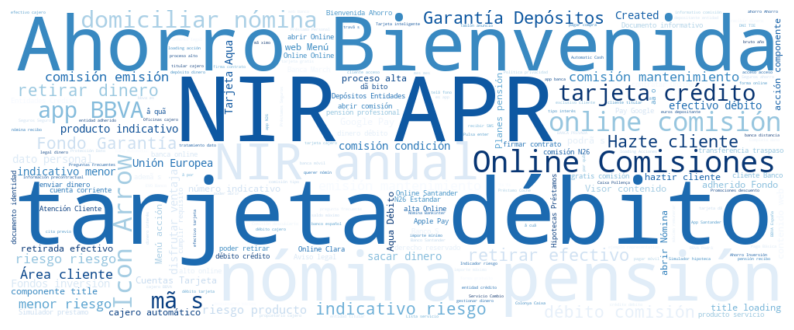

In [269]:
# generate a word cloud for the corpus preprocessed text

from wordcloud import WordCloud

text = ' '.join(all_file_data['preprocessed_text'])
text = text.replace('Sabadell', '')

wordcloud = WordCloud(width=1000, height=400, background_color='white', colormap='Blues').generate(text)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.imshow(wordcloud, interpolation='bilinear')

# change color of the word cloud to white and blue scale text



plt.axis('off')

plt.show()

In [273]:
# get descriptive statistics for text including length, unique words, and average word length

all_file_data['text_len'] = all_file_data['preprocessed_text'].apply(lambda x: len(x))
all_file_data['unique_words'] = all_file_data['preprocessed_text'].apply(lambda x: len(set(x.split())))
all_file_data['avg_word_len'] = all_file_data['preprocessed_text'].apply(lambda x: sum([len(i) for i in x.split()]) / len(x.split()))

# plot the text length, unique words, and average word length grouped by site

grouped = all_file_data.groupby('site')[['text_len','unique_words', 'avg_word_len']].mean()

grouped = grouped.reset_index()

grouped
# change color for the variable type

site      text_len  unique_words  avg_word_len
0          abanca.com  10850.444444    622.666667      5.587374
1   bancosantander.es   8792.750000    508.000000      6.080218
2    bancsabadell.com  12108.833333    662.388889      5.753122
3       bankinter.com  22872.444444    735.694444      5.854981
4             bbva.es  13789.972222    613.555556      5.789014
5        evobanco.com   6535.972222    422.444444      5.670697
6              ing.es   7821.305556    424.888889      5.276338
7       myinvestor.es   4177.606061    321.363636      6.250276
8             n26.com   8740.694444    546.750000      6.995282
9         openbank.es  17493.666667    387.500000      5.903330
10        revolut.com   3209.250000    241.361111      6.980259

In [ ]:
# plot 

In [276]:
# plot the text length, unique words, and average word length grouped by site with multiple y axis


fig = px.bar(grouped, x='site', y='unique_words', title='Unique Words by Site')
fig.show()

In [280]:
# plot the text length, unique words, and average word length grouped by site with multiple y axis

# sort the grouped dataframe by text length

grouped = grouped.sort_values('text_len', ascending=False)
fig = px.bar(grouped, x='site', y='text_len', title='Text Length by Site')
fig.update_xaxes(title='Bank Site')
fig.update_yaxes(title='Text Length')
fig.show()

In [278]:
# plot the text length, unique words, and average word length grouped by site with multiple y axis


fig = px.bar(grouped, x='site', y='avg_word_len', title='Avg Word Length by Site')
fig.show()